# Trending YouTube Video Analysis 
##### (By Marriam Fatima,  Katya Ramos ,Felipe Torres, Richard Huang)

We are analyzing Youtube Trending Video data of Canada and our our analysis is about what kind of videos are more likely to make it to the trending list.


Analysis 1:
    Are videos of certain categories more likely to be trending?


Analysis 2:
    Is there a correlation between the comments and views? 
    
    Does the comment activity (comment/views) on a video affected its likelihood to be in the trending list?


Analysis 3:

3.1  Is there a correlation between the ratio of likes/dislikes of a video and the amount of times a video appears in the youtube trending list?

3.2  Is there a correlation between the ratio of likes/views of a video and the amount of times a video appears in the youtube trending list?

3.3  Does the like, dislikes or views activity on a video affected its likelihood to be in the trending list?


Analysis 4 :

4.1 What is the likelihood of a trending video having capitalized words in its title?

4.2 What is the likelihood of a trending videos having expression marks ("!" or "?") in its title?

4.3 Does having capitalized words or expression marks in titles have any correlation with the number of views, likes, dislikes and comments?


Analysis 5:
    Correlation between the number of tags and the video trending


Analysis 6:
    Is there a correlation between the trending duration and days of publish?


Analysis 7: Perform a sentiment analysis on the video titles. The value SentimentScore indicates the magnitude of sentiment as well as the direction (positive/good or negative/bad)


Analysis 8: Word Vector Scatter Plot

#### References:
#Papadakis, Y. (2018, March). TRENDING VIDEO METADATA ANALYSIS. Retrieved from Kaggle: https://www.kaggle.com/yanpapadakis/trending-youtube-video-metadata-analysis/data
#Alyousfi, Ammar (2018). YouTube Trending Videos Analysis. Retrieved from Kaggle: https://www.kaggle.com/ammar111/youtube-trending-videos-analysis

#Peter (Kernel Author).DEEP ANALYSIS on Youtube Trending Videos - EDA: https://www.kaggle.com/hoonkeng/deep-analysis-on-youtube-trending-videos-eda

In [85]:
import pandas as pd
import json
import numpy as np
from datetime import datetime

import warnings
from collections import Counter
import datetime

import matplotlib.pyplot as plt
from numpy.random import randn
import seaborn as sns
%matplotlib inline

import nltk
import string
import gensim
from gensim.models import Word2Vec
from collections import Counter
from datetime import datetime
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, subjectivity
from nltk.stem.porter import PorterStemmer
from nltk.classify import NaiveBayesClassifier
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.manifold import TSNE
#nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\fatima\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\fatima\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     C:\Users\fatima\AppData\Roaming\nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\fatima\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     C:\Users\fatima\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     C:\Us

[nltk_data]    |   Package shakespeare is already up-to-date!
[nltk_data]    | Downloading package sinica_treebank to
[nltk_data]    |     C:\Users\fatima\AppData\Roaming\nltk_data...
[nltk_data]    |   Package sinica_treebank is already up-to-date!
[nltk_data]    | Downloading package smultron to
[nltk_data]    |     C:\Users\fatima\AppData\Roaming\nltk_data...
[nltk_data]    |   Package smultron is already up-to-date!
[nltk_data]    | Downloading package state_union to
[nltk_data]    |     C:\Users\fatima\AppData\Roaming\nltk_data...
[nltk_data]    |   Package state_union is already up-to-date!
[nltk_data]    | Downloading package stopwords to
[nltk_data]    |     C:\Users\fatima\AppData\Roaming\nltk_data...
[nltk_data]    |   Package stopwords is already up-to-date!
[nltk_data]    | Downloading package subjectivity to
[nltk_data]    |     C:\Users\fatima\AppData\Roaming\nltk_data...
[nltk_data]    |   Package subjectivity is already up-to-date!
[nltk_data]    | Downloading package s

True

In [1]:
# Hiding warnings for cleaner display
warnings.filterwarnings('ignore')

# Configuring some options
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

youtube_data = pd.read_csv('CAVideos.csv')
categories_file = open('CA_category_id.json', 'r')
categories_json = json.load(categories_file)

In [2]:
youtube_categories = pd.DataFrame.from_dict(categories_json['items'])

def extractDictionary(row):
    targetDict = row['snippet']
    for field in targetDict:
        row[field] = targetDict[field]
    return row

youtube_categories = youtube_categories.apply(extractDictionary, axis=1)
youtube_categories = youtube_categories.rename(index=str, columns={"id": "category_id"})
youtube_categories['category_id']=youtube_categories['category_id'].astype(int)
merged_data = youtube_data.merge(youtube_categories, on="category_id", how='left')
merged_data = merged_data.drop(['kind', 'snippet', 'channelId', 'etag', 'thumbnail_link', 'category_id', 'assignable'], axis=1)
merged_data = merged_data.rename(index=str, columns={"trending_date":"Trending Date",
                                                    "video_id":"Video Id",
                                                    "title_x":"Title",
                                                    "channel_title":"Channel Title",
                                                    "publish_time": "Date Published",
                                                    "tags":"Tags",
                                                    "views":"Views",
                                                    "likes":"Likes",
                                                    "dislikes":"Dislikes",
                                                    "comment_count":"Number of Comments",
                                                    "comments_disabled": "Comments Disabled",
                                                    "ratings_disabled": "Ratings Disabled",
                                                    "video_error_or_removed" : "Error Or Removed",
                                                    "description":"Description",
                                                    "title_y":"Category"})


In [3]:
refactored_data = merged_data.astype(str).melt(id_vars='Video Id').drop_duplicates()

refactored_data = refactored_data.pivot_table(
  index='Video Id',
  columns='variable',
  values='value',
  aggfunc='|'.join)

In [4]:
df_ca = refactored_data.dropna()
df_ca

variable,Category,Channel Title,Comments Disabled,Date Published,Description,Dislikes,Error Or Removed,Likes,Number of Comments,Ratings Disabled,Tags,Title,Trending Date,Views
Video Id,,,,,,,,,,,,,,
--45ws7CEN0,Gaming,PlayStation Europe,False,2018-06-12T03:11:18.000Z,Show starts at 1:13:20.E3 2018 has arrived. Jo...,516,False,3837,278,False,"playstation|""playstation 4""|""playstation europ...",PlayStation E3 2018 Showcase | English,18.12.06,309197
--7vNbh4UNA,News & Politics,Philip DeFranco,False,2018-04-13T19:00:00.000Z,"Thanks for tuning in this week, ya Beautiful B...",1284|1504|1576,False,52114|58110|60694,10602|11732|10150,False,"Elizabeth Hurley|""Instagram""|""Outrage""|""scanda...","Responding to ALL The Outrage, Ridiculous H3H3...",18.14.04|18.15.04|18.16.04,1082647|1266423|1335225
--MtKsH5oBY,Sports,RedsTech,False,2018-05-31T12:40:46.000Z,I للتواصل معنا Ihttps://www.facebook.com/RedsT...,372,False,3517,767,False,"RedsTech|""bein sports""|""ريال مدريد""|""real madr...",صحفي بين سبورت يكشف تفاصيل و كواليس استقالة زي...,18.01.06,511042
--YgtVuvWGo,Music,JessieReyezVEVO,False,2018-05-18T04:00:00.000Z,Music video by Jessie Reyez performing Body Co...,356,False,21547,955,False,"Jessie|""Reyez""|""Body""|""Count""|""Island""|""Records""",Jessie Reyez - Body Count,18.20.05,362391
--iJShLChIc,Sports,THSports 2,False,2018-04-30T16:02:26.000Z,nan,134,False,153,254,False,[none],Undisputed | Will LeBron James carry the Cavs ...,18.01.05,54691
--wOJ2VyKDI,News & Politics,CNN,False,2018-02-12T21:41:14.000Z,White House press secretary Sarah Sanders says...,214,False,569,1513,False,"latest News|""Happening Now""|""CNN""|""politics""|""...",WH on Trump's Porter tweet: Not taking a side,18.14.02,133631
-0CMnp02rNY,Entertainment,TheEllenShow,False,2018-06-04T13:00:00.000Z,Ocean's 8 star Mindy Kaling dished on bringing...,52,False,3388,128,False,"ellen|""ellen degeneres""|""the ellen show""|""elle...",Mindy Kaling's Daughter Had the Perfect Reacti...,18.05.06,219401
-0DjA_r32uQ,Education,Destroying the Illusion,False,2018-02-12T23:44:59.000Z,Find me on:\nhttp://www.destroyingtheillusion....,62,False,2190,768,False,"jordan sather|""destroying the illusion""|""qanon...",2.12 - Q & Current Event Analysis from Feb 11t...,18.14.02,57494
-0F7AFzWXik,News & Politics,CBC News,False,2018-02-18T19:04:23.000Z,Is Russia funding the NRA? The FBI is looking ...,108,False,152,205,False,"donald trump|""russia""|""putin""|""kremlin""|""NRA""|...",Is Russia funding the NRA?,18.19.02,6070


In [5]:
import matplotlib.pyplot as plt
from numpy.random import randn
import seaborn as sns
%matplotlib inline

### Analysis 1: Are videos of certain categories more likely to be trending?

In [6]:
# First, we determined the total number of categories in the data set. There is a total of 31 categories.

Cat = df_ca.groupby("Category").size().reset_index(name="No_of_videos")
Cat

,Category,No_of_videos
0,Autos & Vehicles,248
1,Comedy,1945
2,Comedy|Music,1
3,Education,590
4,Entertainment,8241
5,Entertainment|Film & Animation,1
6,Entertainment|Shows,6
7,Film & Animation,1150
8,Film & Animation|Music,1
9,Gaming,771


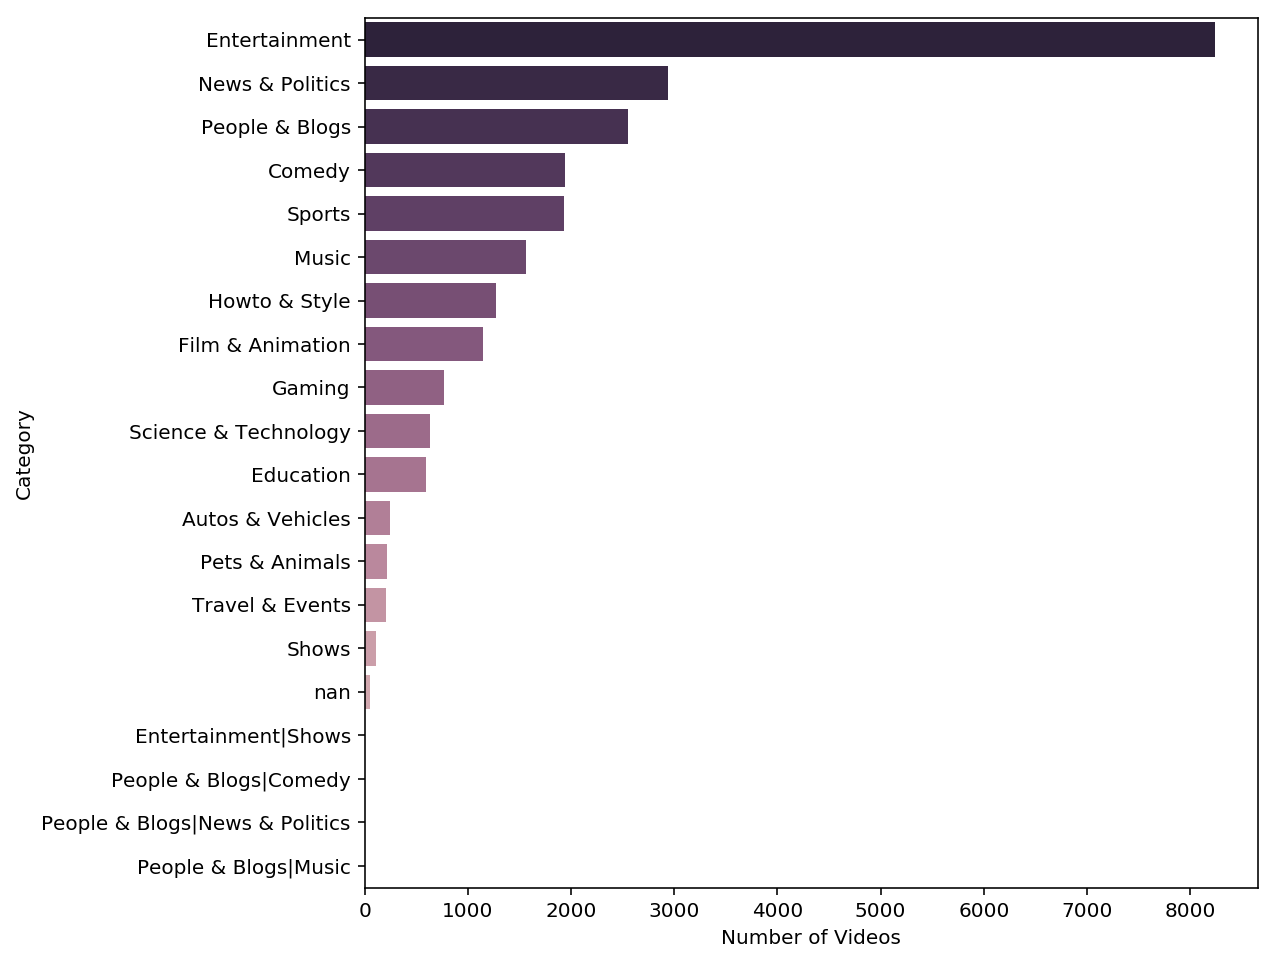

In [7]:
# Second, we organized the categories to determine the most trending one - The most popular category is Entertainment. 
# It has the largest amount of trending videos among all categories with over 8,000 videos followed by News and Politics 
# with less than half the number of videos.

Cat = df_ca.groupby("Category").size().reset_index(name="No_of_videos") \
    .sort_values("No_of_videos", ascending=False).head(20)

fig, ax = plt.subplots(figsize=(8,8))
_ = sns.barplot(x="No_of_videos", y="Category", data=Cat,
                palette=sns.cubehelix_palette(n_colors=20, reverse=True), ax=ax)
_ = ax.set(xlabel="Number of Videos", ylabel="Category")

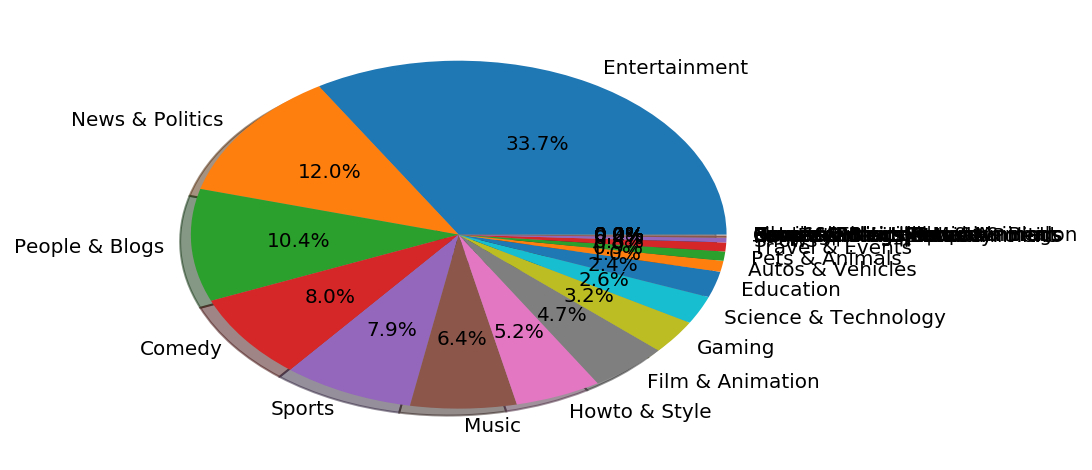

In [8]:
# Similarly, as we plot a pie chart, we can see that Entertainment represents more than 30% of the trending videos.

Category = df_ca['Category']
category_count = Category.value_counts(normalize=True)
pie = plt.pie(category_count,labels=category_count.index, shadow=True, autopct='%1.1f%%')


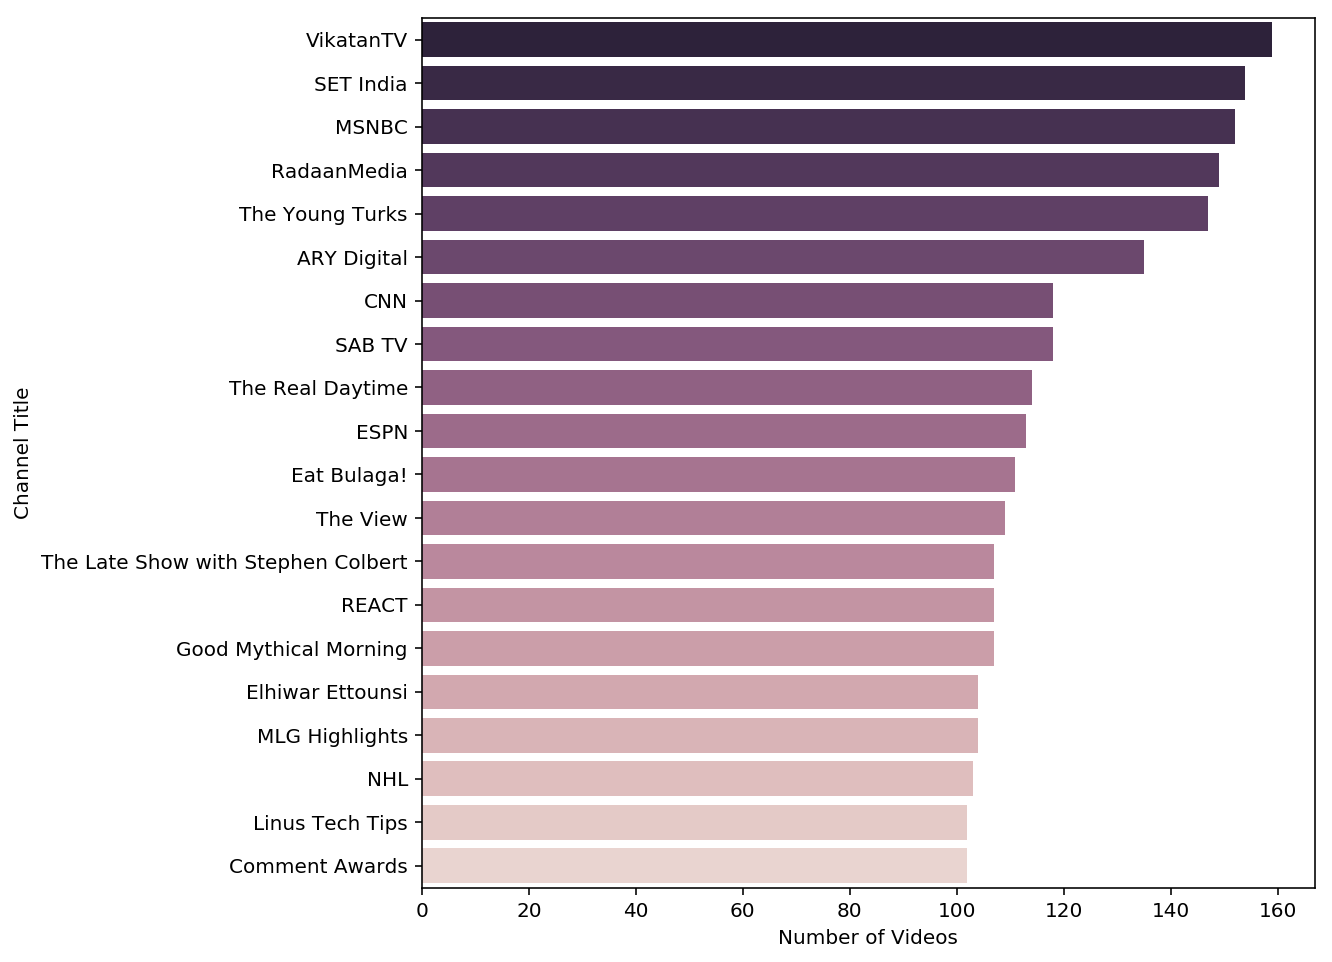

In [9]:
# As we explored Channels, we can see that VikatanTV, a political news, perspectives, commentary & satire channel, leads the ranking 
# followed by SET India.

Cat = df_ca.groupby("Channel Title").size().reset_index(name="No_of_videos") \
    .sort_values("No_of_videos", ascending=False).head(20)

fig, ax = plt.subplots(figsize=(8,8))
_ = sns.barplot(x="No_of_videos", y="Channel Title", data=Cat,
                palette=sns.cubehelix_palette(n_colors=20, reverse=True), ax=ax)
_ = ax.set(xlabel="Number of Videos", ylabel="Channel Title")

In [10]:
# We'll then analyze the top channel by category, but, first, we extracted the last value
# for the column "Views" in order to sort values by this variable.

def splitColumn(row):
    row['FinalViews'] = row['Views'].split('|')[-1]
    return row
df_ca = df_ca.apply(splitColumn,axis=1)
df_ca.head()

variable,Category,Channel Title,Comments Disabled,Date Published,Description,Dislikes,Error Or Removed,Likes,Number of Comments,Ratings Disabled,Tags,Title,Trending Date,Views,FinalViews
Video Id,,,,,,,,,,,,,,,
--45ws7CEN0,Gaming,PlayStation Europe,False,2018-06-12T03:11:18.000Z,Show starts at 1:13:20.E3 2018 has arrived. Jo...,516,False,3837,278,False,"playstation|""playstation 4""|""playstation europ...",PlayStation E3 2018 Showcase | English,18.12.06,309197,309197
--7vNbh4UNA,News & Politics,Philip DeFranco,False,2018-04-13T19:00:00.000Z,"Thanks for tuning in this week, ya Beautiful B...",1284|1504|1576,False,52114|58110|60694,10602|11732|10150,False,"Elizabeth Hurley|""Instagram""|""Outrage""|""scanda...","Responding to ALL The Outrage, Ridiculous H3H3...",18.14.04|18.15.04|18.16.04,1082647|1266423|1335225,1335225
--MtKsH5oBY,Sports,RedsTech,False,2018-05-31T12:40:46.000Z,I للتواصل معنا Ihttps://www.facebook.com/RedsT...,372,False,3517,767,False,"RedsTech|""bein sports""|""ريال مدريد""|""real madr...",صحفي بين سبورت يكشف تفاصيل و كواليس استقالة زي...,18.01.06,511042,511042
--YgtVuvWGo,Music,JessieReyezVEVO,False,2018-05-18T04:00:00.000Z,Music video by Jessie Reyez performing Body Co...,356,False,21547,955,False,"Jessie|""Reyez""|""Body""|""Count""|""Island""|""Records""",Jessie Reyez - Body Count,18.20.05,362391,362391
--iJShLChIc,Sports,THSports 2,False,2018-04-30T16:02:26.000Z,nan,134,False,153,254,False,[none],Undisputed | Will LeBron James carry the Cavs ...,18.01.05,54691,54691


In [11]:
# Then, we had to make a conversion from object to an integer for the following column variables.

df_ca[["FinalViews"]]=df_ca[["FinalViews",]].apply(pd.to_numeric)

# We notice that overall, the most watched channel is Youtube Spotlight, a channel for spotlighting videos and events on YouTube, 
#followed by ChildishGambinoVEVO, a music channel.

df_ca.sort_values(by=['FinalViews'],ascending=False).head()

variable,Category,Channel Title,Comments Disabled,Date Published,Description,Dislikes,Error Or Removed,Likes,Number of Comments,Ratings Disabled,Tags,Title,Trending Date,Views,FinalViews
Video Id,,,,,,,,,,,,,,,
FlsCjmMhFmw,Entertainment,YouTube Spotlight,False,2017-12-06T17:58:51.000Z,"YouTube Rewind 2017. Celebrating the videos, p...",483943|884963|1127811|1353655|1470387|1545018|...,False,1149214|1891822|2251826|2656678|2811217|291271...,461970|702784|827755|682890|787174|807558|817582,False,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",YouTube Rewind: The Shape of 2017 | #YouTubeRe...,17.07.12|17.08.12|17.09.12|17.10.12|17.11.12|1...,24784863|52611730|75969469|100911567|113876217...,137843120
VYOjWnS4cMY,Music,ChildishGambinoVEVO,False,2018-05-06T04:00:07.000Z,“This is America” by Childish Gambino http://s...,1660|25829|51548|79717|104379|124291|140711|16...,False,109193|801866|1405376|1841549|2183745|2478908|...,13795|81156|149478|194822|232723|263984|289682...,False,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",Childish Gambino - This Is America (Official V...,18.06.05|18.07.05|18.08.05|18.09.05|18.10.05|1...,546527|14171087|31648454|47169016|60776509|734...,98938809
6ZfuNTqbHE8,Entertainment,Marvel Entertainment,False,2017-11-29T13:26:24.000Z,There was an idea… Avengers: Infinity War. In ...,21972|34078|41154|46172|49170|51008|52176|53011,False,1735931|2157741|2331359|2444960|2513103|255541...,241237|303178|316185|330710|335920|339708|3415...,False,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",Marvel Studios' Avengers: Infinity War Officia...,17.30.11|17.01.12|17.02.12|17.03.12|17.04.12|1...,37736281|56367282|66637636|74789251|80360459|8...,89930713
7C2z4GqqS5E,Music,ibighit,False,2018-05-18T09:00:02.000Z,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...,72707|119046|141966|156026|165854,False,3880074|4470888|4750254|4924056|5053338,692311|905912|1040912|1084435|1114800,False,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""|BIGH...",BTS (방탄소년단) 'FAKE LOVE' Official MV,18.19.05|18.20.05|18.21.05|18.22.05|18.23.05,39349927|62796390|65396157|73463137|80738011,80738011
_I_D_8Z4sJE,Music,NickyJamTV,False,2018-03-02T05:00:19.000Z,Nicky Jam y J. Balvin performing X \nNuevo vid...,1124|10540|16682|20865|23851,False,45716|304510|448370|550477|629164,4023|13903|19908|23521|26762,False,"Bad Bunny|""Amorfoda""|""Dura""|""Daddy Yankee""|""Oz...",Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,18.02.03|18.03.03|18.04.03|18.05.03|18.06.03,359405|30686233|40567774|50896717|61163906,61163906


In [12]:
# Now, we'll make a zoom on the Entertainment category. To this end, we first grouped by "Category".
df_ca.groupby('Category')

In [13]:
# As expected, we can see Channel Tittle per Category
Category_grouped = df_ca.groupby('Category')
Category_grouped.groups

{'Autos & Vehicles': Index(['-q5Ey1Qgru0', '-wY8hWM2ikQ', '-wj1pc3tJEk', '-xJENOQPcjE',
        '0-eWzZuXUQg', '0SHo9NSpobk', '0YVbVXOjJv4', '0n2NLUynnyk',
        '11ZcjpDJNvA', '1Ui_nkYR7Y0',
        ...
        'xFVwo-AZTbA', 'xGBqwZ9iBOQ', 'xeYcqgOCH8s', 'xykPzNGFki4',
        'y9r_3IJdtkU', 'yLfRPT5sEEI', 'yido7eBL-GI', 'yuDGcDygadM',
        'zCp-kE9sqxw', 'zylunvHhn9A'],
       dtype='object', name='Video Id', length=248),
 'Comedy': Index(['-1Hm41N0dUs', '-3t6yONlGG4', '-5I4FCUo7AA', '-7AZX5Xtiks',
        '-9OfAHgdV8Y', '-EjcrM2wFak', '-El8z4uy5Ac', '-HX0Lpo2PF8',
        '-HhmI5wu0w8', '-IJIy18-u7c',
        ...
        'zcg58MB04GI', 'zeKHDsKjfoQ', 'zlFiWk5WFgk', 'zs0eGCBcBTM',
        'zs34ko3ZF7s', 'zsXzPDB1_q4', 'zvSKwwYYySY', 'zwV6Ygc93mQ',
        'zy_8tFn2ykk', 'zy_df28N7WE'],
       dtype='object', name='Video Id', length=1945),
 'Comedy|Music': Index(['qQn6TsbYrH8'], dtype='object', name='Video Id'),
 'Education': Index(['-0DjA_r32uQ', '-0Rj7qcLu1A', '-AGEHJQ0SY8', '

In [14]:
# Finally, we filter by the entertainment category, which has over 30% of videos, and sort by number of views to see the
# top Channels. Again, Youtube Spotlight Channel is number one followed by Sci-Fi channels.

Category_grouped.get_group('Entertainment').sort_values(by=['FinalViews'],ascending=False).head()

variable,Category,Channel Title,Comments Disabled,Date Published,Description,Dislikes,Error Or Removed,Likes,Number of Comments,Ratings Disabled,Tags,Title,Trending Date,Views,FinalViews
Video Id,,,,,,,,,,,,,,,
FlsCjmMhFmw,Entertainment,YouTube Spotlight,False,2017-12-06T17:58:51.000Z,"YouTube Rewind 2017. Celebrating the videos, p...",483943|884963|1127811|1353655|1470387|1545018|...,False,1149214|1891822|2251826|2656678|2811217|291271...,461970|702784|827755|682890|787174|807558|817582,False,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",YouTube Rewind: The Shape of 2017 | #YouTubeRe...,17.07.12|17.08.12|17.09.12|17.10.12|17.11.12|1...,24784863|52611730|75969469|100911567|113876217...,137843120
6ZfuNTqbHE8,Entertainment,Marvel Entertainment,False,2017-11-29T13:26:24.000Z,There was an idea… Avengers: Infinity War. In ...,21972|34078|41154|46172|49170|51008|52176|53011,False,1735931|2157741|2331359|2444960|2513103|255541...,241237|303178|316185|330710|335920|339708|3415...,False,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",Marvel Studios' Avengers: Infinity War Officia...,17.30.11|17.01.12|17.02.12|17.03.12|17.04.12|1...,37736281|56367282|66637636|74789251|80360459|8...,89930713
u9Mv98Gr5pY,Entertainment,Sony Pictures Entertainment,False,2018-04-24T03:45:03.000Z,We Are #Venom. 10.5.18\n\nOne of Marvel's most...,5948|26542|35762|40086|42254|43653|44414,False,220604|850372|1077727|1166898|1204864|1229060|...,29519|96767|119671|127694|130891|133144|134673,False,"Venom|""Venom Movie""|""Venom (2018)""|""Marvel""|""M...",VENOM - Official Trailer (HD),18.24.04|18.25.04|18.26.04|18.27.04|18.28.04|1...,2358881|27973210|39128403|45759148|49185287|51...,53071887
QwievZ1Tx-8,Entertainment,Marvel Entertainment,False,2018-03-16T13:02:41.000Z,In theaters April 27. Get your tickets now: ht...,9119|16902|22416|26137|28312|29812|30566,False,975747|1242233|1355012|1420088|1465001|1494997...,127045|158047|170801|177598|182514|186005|188160,False,"marvel|""comics""|""comic books""|""nerd""|""geek""|""s...",Marvel Studios' Avengers: Infinity War - Offic...,18.17.03|18.18.03|18.19.03|18.20.03|18.21.03|1...,19716689|30180849|36112519|39980116|42862117|4...,46707200
rRr1qiJRsXk,Entertainment,FoxStarHindi,False,2018-04-24T07:58:08.000Z,Few lives in our times are as dramatic and eni...,15607|21140|23885|26170|28091,False,511772|646405|689920|719461|742223,32435|40610|42689|44335|45614,False,"Sanju Teaser|""Official Teaser""|""Sanju Official...",Sanju | Official Teaser | Ranbir Kapoor | Rajk...,18.25.04|18.26.04|18.27.04|18.28.04|18.29.04,18639195|28572753|32679759|36202030|39207474,39207474


### Analysis 2: Is there a correlation between the comments and views? Does the comment activity (comment/views) on a video affected its likelihood to be in the trending list?

In [15]:
# First, we extracted the last value for the column Dislikes, Likes, Number of Comments, Trending Date and Views.

def splitColumn(row):
    row['FinalDislikes'] = row['Dislikes'].split('|')[-1]
    row['FinalLikes'] = row['Likes'].split('|')[-1]
    row['FinalNumberComments'] = row['Number of Comments'].split('|')[-1]
    row['FinalTrendingDate'] = row['Trending Date'].split('|')[-1]
    return row
df_ca = df_ca.apply(splitColumn,axis=1)
df_ca.head()

variable,Category,Channel Title,Comments Disabled,Date Published,Description,Dislikes,Error Or Removed,Likes,Number of Comments,Ratings Disabled,Tags,Title,Trending Date,Views,FinalViews,FinalDislikes,FinalLikes,FinalNumberComments,FinalTrendingDate
Video Id,,,,,,,,,,,,,,,,,,,
--45ws7CEN0,Gaming,PlayStation Europe,False,2018-06-12T03:11:18.000Z,Show starts at 1:13:20.E3 2018 has arrived. Jo...,516,False,3837,278,False,"playstation|""playstation 4""|""playstation europ...",PlayStation E3 2018 Showcase | English,18.12.06,309197,309197,516,3837,278,18.12.06
--7vNbh4UNA,News & Politics,Philip DeFranco,False,2018-04-13T19:00:00.000Z,"Thanks for tuning in this week, ya Beautiful B...",1284|1504|1576,False,52114|58110|60694,10602|11732|10150,False,"Elizabeth Hurley|""Instagram""|""Outrage""|""scanda...","Responding to ALL The Outrage, Ridiculous H3H3...",18.14.04|18.15.04|18.16.04,1082647|1266423|1335225,1335225,1576,60694,10150,18.16.04
--MtKsH5oBY,Sports,RedsTech,False,2018-05-31T12:40:46.000Z,I للتواصل معنا Ihttps://www.facebook.com/RedsT...,372,False,3517,767,False,"RedsTech|""bein sports""|""ريال مدريد""|""real madr...",صحفي بين سبورت يكشف تفاصيل و كواليس استقالة زي...,18.01.06,511042,511042,372,3517,767,18.01.06
--YgtVuvWGo,Music,JessieReyezVEVO,False,2018-05-18T04:00:00.000Z,Music video by Jessie Reyez performing Body Co...,356,False,21547,955,False,"Jessie|""Reyez""|""Body""|""Count""|""Island""|""Records""",Jessie Reyez - Body Count,18.20.05,362391,362391,356,21547,955,18.20.05
--iJShLChIc,Sports,THSports 2,False,2018-04-30T16:02:26.000Z,nan,134,False,153,254,False,[none],Undisputed | Will LeBron James carry the Cavs ...,18.01.05,54691,54691,134,153,254,18.01.05


In [16]:
# Then, we had to make a conversion from object to an integer for the following column variables.

df_ca[["FinalNumberComments"]]=df_ca[["FinalNumberComments"]].apply(pd.to_numeric)

In [17]:
# Now, we move into analyzing the variable "Comments". Let's begin with a summary statistic table.

df_ca['FinalNumberComments'].describe()

count    2.442700e+04
mean     3.374223e+03
std      1.492671e+04
min      0.000000e+00
25%      2.980000e+02
50%      9.640000e+02
75%      2.592000e+03
max      1.114800e+06
Name: FinalNumberComments, dtype: float64

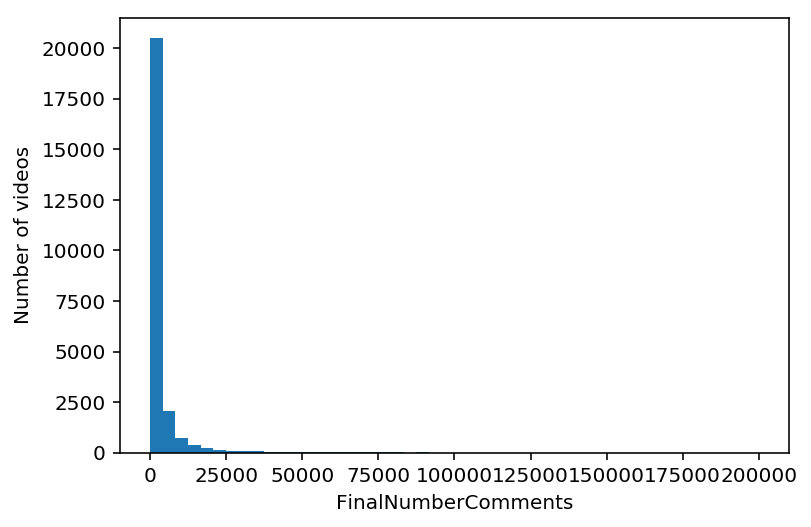

In [18]:
# Based on the histogram below, the majority of trending videos have less than 25,000 comments.

fig, ax = plt.subplots()
_ = sns.distplot(df_ca[df_ca["FinalNumberComments"] < 100000]["FinalNumberComments"], kde=False, rug=False, 
                 hist_kws={'alpha': 1}, 
                 bins=np.linspace(0, 2e5, 49), ax=ax)
_ = ax.set(xlabel="FinalNumberComments", ylabel="Number of videos")

In [19]:
# To be precise, 98% of videos have less than 25,000 comments

df_ca[df_ca['FinalNumberComments'] < 25000]['FinalNumberComments'].count() / df_ca['FinalNumberComments'].count() * 100

97.99402300732795

In [20]:
# and almost half of the videos have less than 1,000 comments

df_ca[df_ca['FinalNumberComments'] < 1000]['FinalNumberComments'].count() / df_ca['FinalNumberComments'].count() * 100

50.927252630286155

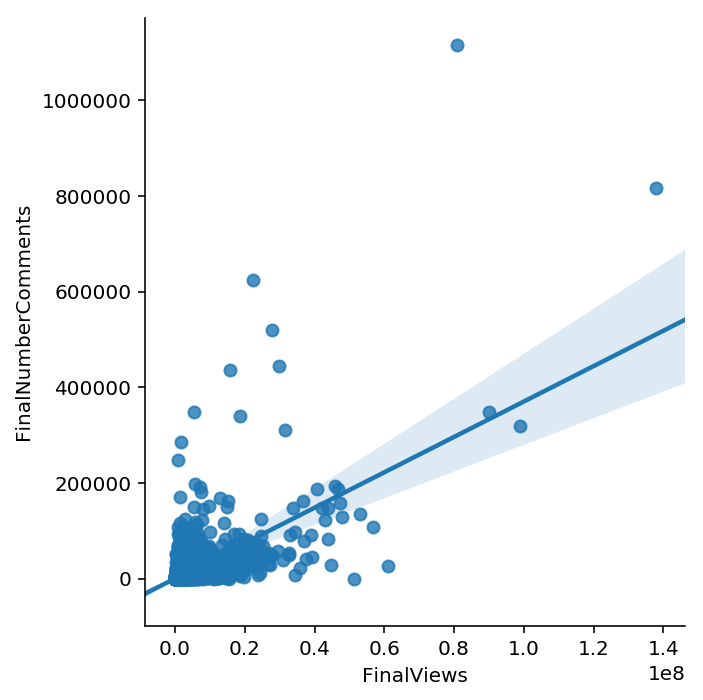

In [21]:
# In this correlation analysis between Views and Comments, we observe that the variables tend to have a positive correlation.

sns.lmplot('FinalViews','FinalNumberComments',data=df_ca)

In [22]:
# These variables have a strong positive correlation of 0.65.

df_ca.corr()

variable,FinalViews,FinalNumberComments
variable,,
FinalViews,1.000000,0.648283
FinalNumberComments,0.648283,1.000000


In [23]:
# Also, we want to explore how many comments per views are across the trending videos. To this end, we calculated the Comment 
# Rate variable (Comments/Views).

df_ca['Comment Rate'] = df_ca['FinalNumberComments'] / df_ca['FinalViews'] * 100

In [24]:
# Let's begin by analyzing a summary statistic for this new variable. Based on the percentiles, we can infer that there're  
# more views than comments per video.

df_ca['Comment Rate'].describe()

count    24427.000000
mean         0.540931
std          0.742474
min          0.000000
25%          0.145062
50%          0.339630
75%          0.664881
max         30.460041
Name: Comment Rate, dtype: float64

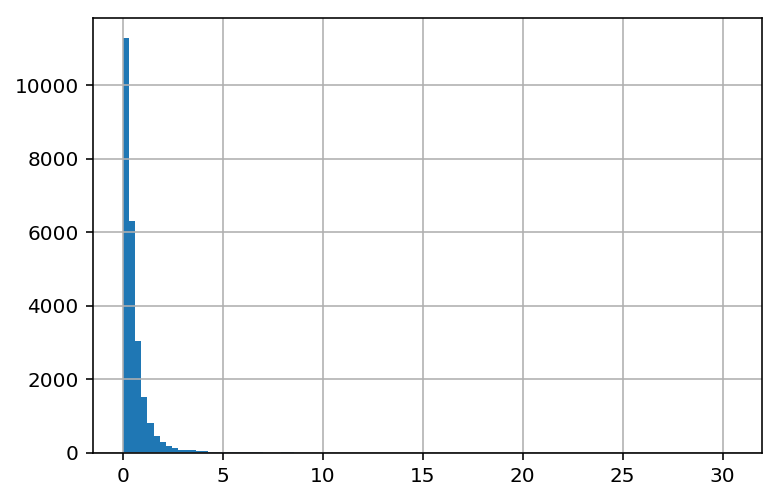

In [25]:
# most of the videos have a comment rate less than 5

df_ca['Comment Rate'].hist(bins=100)

In [26]:
# but, 86% of this data has a comment rate less than 1, which confirms that, for the trending videos, views tend to surpass 
# comments. Hence, a high comment activity (comments/views) does not necessarily increase the likelihood to be on the trending list. 

df_ca[df_ca['Comment Rate'] < 1]['Comment Rate'].count() / df_ca['Comment Rate'].count() * 100

86.51082818192984

###### Our Analysis shows that there are more than 20,000 videos on the Trending Youtube Video List across thirty-one categories. Entertainment has a third of the trending videos with more than 8,000 creative assets, followed by News and Politics with less than half the number of videos.

By analyzing for the comment activity, we observed that there’s a strong positive correlation between comments and views (over 0.6), however, we found that a high comment rate (comments/views) is not necessary to appear on the Trending Youtube Video List. In fact, there tend to be more views than comments per video with an average comment to view ratio of 0.5.

In [27]:
#References:
#Papadakis, Y. (2018, March). TRENDING VIDEO METADATA ANALYSIS. Retrieved from Kaggle: https://www.kaggle.com/yanpapadakis/trending-youtube-video-metadata-analysis/data
#Alyousfi, A. (2018). YouTube Trending Videos Analysis. Retrieved from Kaggle: https://www.kaggle.com/ammar111/youtube-trending-videos-analysis

### Analysis 3:
3.1  Is there a correlation between the ratio of likes/dislikes of a video and the amount of times a video appears in the youtube trending list?

3.2  Is there a correlation between the ratio of likes/views of a video and the amount of times a video appears in the youtube trending list?

3.3  Does the like, dislikes or views activity on a video affected its likelihood to be in the trending list?

In [27]:
df_ca.columns

Index(['Category', 'Channel Title', 'Comments Disabled', 'Date Published',
       'Description', 'Dislikes', 'Error Or Removed', 'Likes',
       'Number of Comments', 'Ratings Disabled', 'Tags', 'Title',
       'Trending Date', 'Views', 'FinalViews', 'FinalDislikes', 'FinalLikes',
       'FinalNumberComments', 'FinalTrendingDate', 'Comment Rate'],
      dtype='object', name='variable')

In [28]:
df_ca.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24427 entries, --45ws7CEN0 to zzjNCiCqiOs
Data columns (total 20 columns):
Category               24427 non-null object
Channel Title          24427 non-null object
Comments Disabled      24427 non-null object
Date Published         24427 non-null object
Description            24427 non-null object
Dislikes               24427 non-null object
Error Or Removed       24427 non-null object
Likes                  24427 non-null object
Number of Comments     24427 non-null object
Ratings Disabled       24427 non-null object
Tags                   24427 non-null object
Title                  24427 non-null object
Trending Date          24427 non-null object
Views                  24427 non-null object
FinalViews             24427 non-null int64
FinalDislikes          24427 non-null object
FinalLikes             24427 non-null object
FinalNumberComments    24427 non-null int64
FinalTrendingDate      24427 non-null object
Comment Rate           2442

In [29]:
#We have to make a convertion from object to integer for the following column variables
df_ca[["FinalDislikes", "FinalLikes" , "FinalNumberComments" , "FinalViews"]] = df_ca[["FinalDislikes", "FinalLikes", "FinalNumberComments" , "FinalViews"]].apply(pd.to_numeric)
#To corroborate that all the specified variables were actually changed to integers
df_ca.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24427 entries, --45ws7CEN0 to zzjNCiCqiOs
Data columns (total 20 columns):
Category               24427 non-null object
Channel Title          24427 non-null object
Comments Disabled      24427 non-null object
Date Published         24427 non-null object
Description            24427 non-null object
Dislikes               24427 non-null object
Error Or Removed       24427 non-null object
Likes                  24427 non-null object
Number of Comments     24427 non-null object
Ratings Disabled       24427 non-null object
Tags                   24427 non-null object
Title                  24427 non-null object
Trending Date          24427 non-null object
Views                  24427 non-null object
FinalViews             24427 non-null int64
FinalDislikes          24427 non-null int64
FinalLikes             24427 non-null int64
FinalNumberComments    24427 non-null int64
FinalTrendingDate      24427 non-null object
Comment Rate           24427 

In [ ]:
#3.1 & 3.2
#First, we create the new ratio variables
df_ca['Ratio Likes/Dislikes'] = df_ca['FinalLikes']/df_ca['FinalDislikes']
df_ca['Ratio Likes/Views'] = df_ca['FinalLikes']/df_ca['FinalViews']
df_ca.head()

In [31]:
#Second, create a column with the number of ocurrences of videos on the trending list
df_ca['count_ocurrences']=df_ca['Views'].apply(lambda x: str.count(x, '|'))
df_ca.head(5)

variable,Category,Channel Title,Comments Disabled,Date Published,Description,Dislikes,Error Or Removed,Likes,Number of Comments,Ratings Disabled,...,Views,FinalViews,FinalDislikes,FinalLikes,FinalNumberComments,FinalTrendingDate,Comment Rate,Ratio Likes/Dislikes,Ratio Likes/Views,count_ocurrences
Video Id,,,,,,,,,,,,,,,,,,,,,
--45ws7CEN0,Gaming,PlayStation Europe,False,2018-06-12T03:11:18.000Z,Show starts at 1:13:20.E3 2018 has arrived. Jo...,516,False,3837,278,False,...,309197,309197,516,3837,278,18.12.06,0.089910,7.436047,0.012410,0
--7vNbh4UNA,News & Politics,Philip DeFranco,False,2018-04-13T19:00:00.000Z,"Thanks for tuning in this week, ya Beautiful B...",1284|1504|1576,False,52114|58110|60694,10602|11732|10150,False,...,1082647|1266423|1335225,1335225,1576,60694,10150,18.16.04,0.760172,38.511421,0.045456,2
--MtKsH5oBY,Sports,RedsTech,False,2018-05-31T12:40:46.000Z,I للتواصل معنا Ihttps://www.facebook.com/RedsT...,372,False,3517,767,False,...,511042,511042,372,3517,767,18.01.06,0.150086,9.454301,0.006882,0
--YgtVuvWGo,Music,JessieReyezVEVO,False,2018-05-18T04:00:00.000Z,Music video by Jessie Reyez performing Body Co...,356,False,21547,955,False,...,362391,362391,356,21547,955,18.20.05,0.263528,60.525281,0.059458,0
--iJShLChIc,Sports,THSports 2,False,2018-04-30T16:02:26.000Z,nan,134,False,153,254,False,...,54691,54691,134,153,254,18.01.05,0.464427,1.141791,0.002798,0


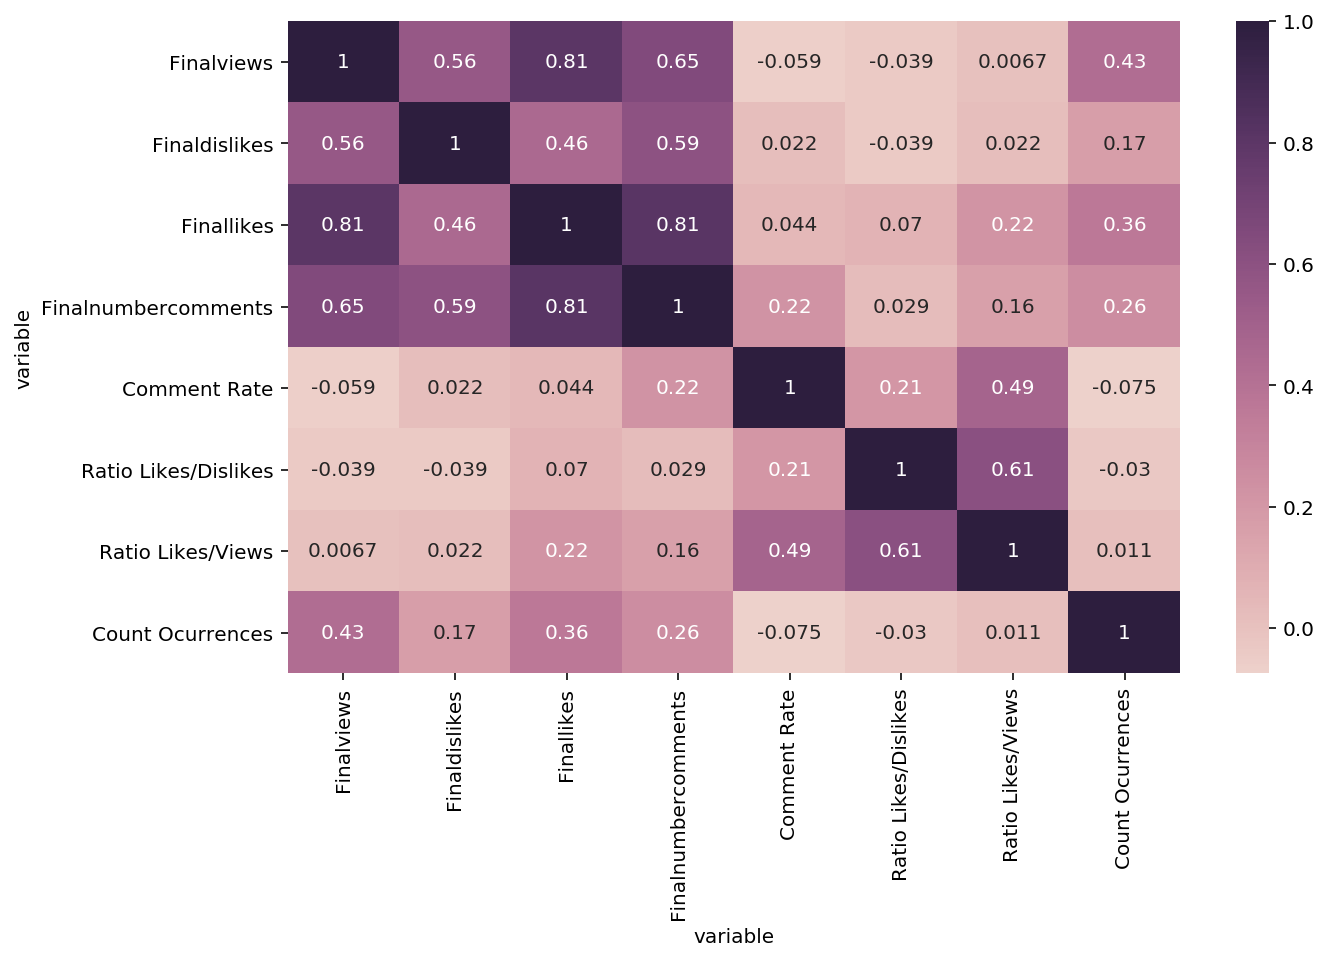

In [32]:
#we do a Correlation Map
h_labels = [x.replace('_', ' ').title() for x in 
            list(df_ca.select_dtypes(include=['number', 'bool']).columns.values)]

fig, ax = plt.subplots(figsize=(10,6))
_ = sns.heatmap(df_ca.corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)

3.1 Analysis: Based on the correlation map, we see that the ratio Like/Dislike has a negative correlation and video occurences. So that means that when the ratio grows the video ocurrence in the trending list decrease. However, there is a positive but weak correlation between the ratio of like/views and video occurences. Let's explore more in detail these correlation with a scatter plot

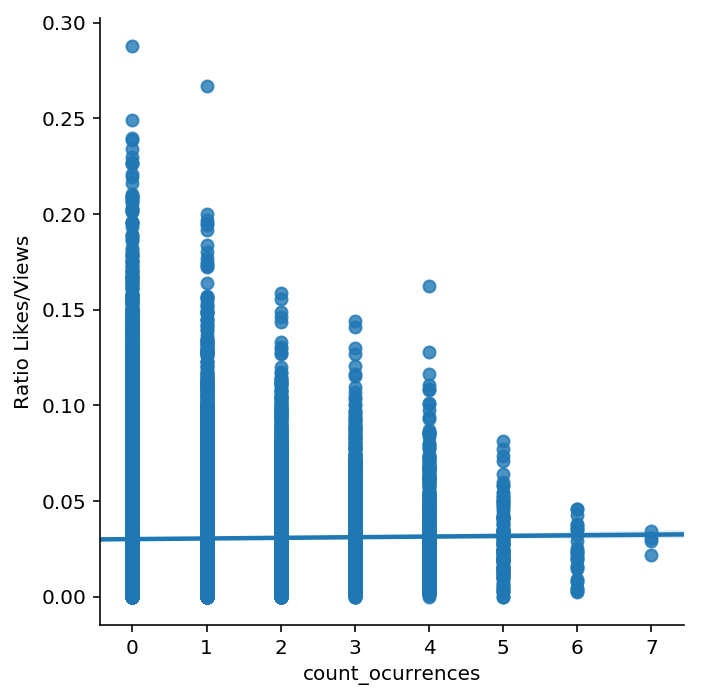

In [33]:
sns.lmplot('count_ocurrences','Ratio Likes/Views',data=df_ca)

3.2 The scatter plot shows, that eventhough the majority has an unique ocurrences of showing up in the trending list, the correlation between the ratio of likes and views and count ocurrences is valid. We can see that see that the ratio of likes/views and count ocurrences are truly positively correlated: as one increases, the other increases too, mostly

In [34]:
#3.3
#Analysis of Likes activity and Numbers of Videos in the trending list
#First, we will check the describition of the variable to get a sense of the data
df_ca['FinalLikes'].describe().apply(lambda x: format(x, 'f'))

count      24427.000000
mean       25821.394400
std        95145.428382
min            0.000000
25%         1519.000000
50%         5532.000000
75%        18745.000000
max      5053338.000000
Name: FinalLikes, dtype: object

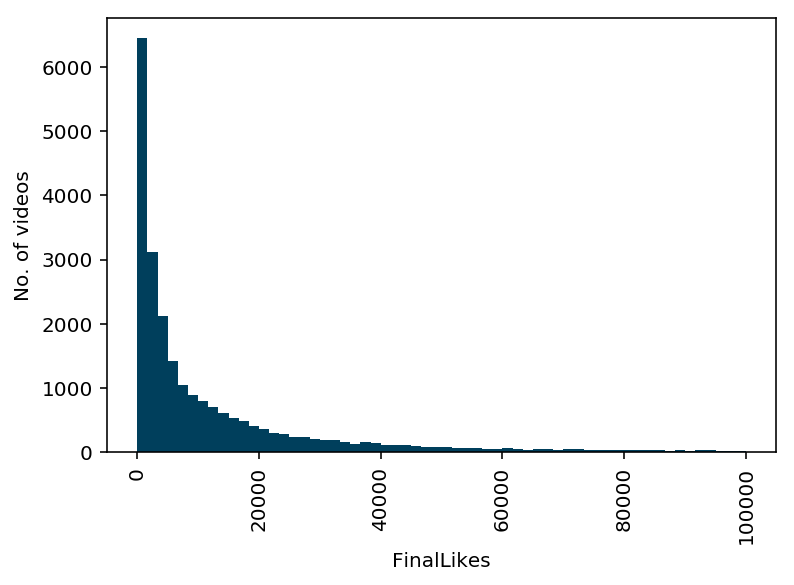

In [35]:
# we check with an histogram the behavior of the likes in the trending list by comparing wiht the number of videos
PLOT_COLORS = ["#268bd2", "#0052CC", "#FF5722", "#b58900", "#003f5c"]

plt.rc('figure.subplot', wspace=0.9)
fig, ax = plt.subplots()
_ = sns.distplot(df_ca["FinalLikes"], kde=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, 
                 bins=np.linspace(0, 1e5, 61), ax=ax)
_ = ax.set(xlabel="FinalLikes", ylabel="No. of videos")
_ = plt.xticks(rotation=90)

Based on the histogram graph, we can see that the majority of trending videos have 40,000 likes or less with a peak for videos with 20,000 likes or less. Let's find the percetange of the videos in the trending list that have less than 40,000 likes

In [36]:
df_ca[df_ca['FinalLikes'] < 4e4]['FinalLikes'].count() / df_ca['FinalLikes'].count() * 100

86.89974208867237

With a percetange of 87% of the videos in the trending list with less than 40,000 likes. We can conclude that having less than 40,000 likes give you a very high probability on getting into the trending list.

In [37]:
#Analysis of dislikes activity and Numbers of Videos in the trending list
#First, we will check the describition of the variable to get a sense of the data
df_ca['FinalDislikes'].describe().apply(lambda x: format(x, 'f'))

count      24427.000000
mean        1277.902690
std        12502.852918
min            0.000000
25%           75.000000
50%          223.000000
75%          677.500000
max      1602383.000000
Name: FinalDislikes, dtype: object

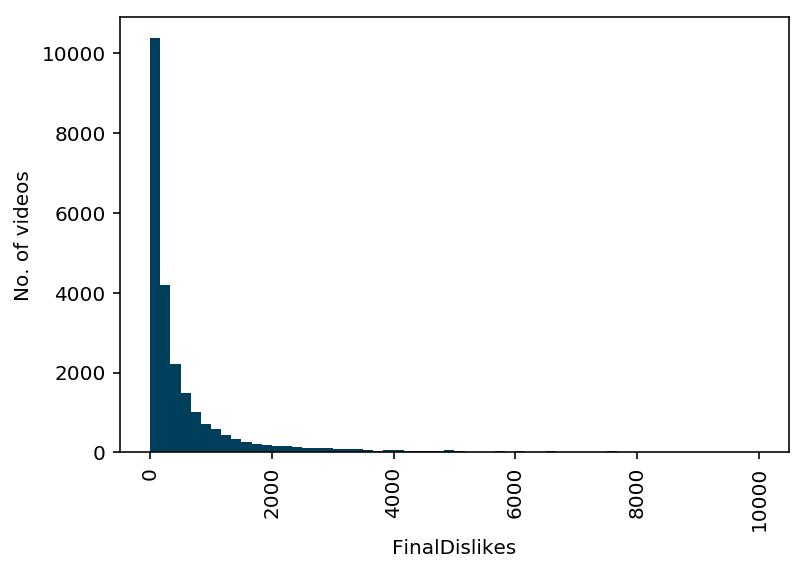

In [38]:
#Second, we check with an histogram the behavior of the dislikes in the trending list by comparing wiht the number of videos
plt.rc('figure.subplot', wspace=0.9)
fig, ax = plt.subplots()
_ = sns.distplot(df_ca["FinalDislikes"], kde=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, 
                 bins=np.linspace(0, 1e4, 61), ax=ax)
_ = ax.set(xlabel="FinalDislikes", ylabel="No. of videos")
_ = plt.xticks(rotation=90)

Based on the histogram graph, the majority of trending videos have between 0 and 4,000 dislikes with a peak for videos with 2,000 dislikes or less. Let's find the percetange of the videos in the trending list that have less than 2,000 dislikes

In [39]:
df_ca[df_ca['FinalDislikes'] < 2e3]['FinalDislikes'].count() / df_ca['FinalDislikes'].count() * 100

90.19527571949072

With a percetange of 90% of the videos in the trending list with less than 2,000 dislikes. We can conclude that having less than 2,000 dislikes give you a very high probability on getting into the trending list.

In [40]:
#Analysis of view activity and Numbers of Videos in the trending list
# First, we will check the describition of the variable to get a sense of the data
df_ca['FinalViews'].describe().apply(lambda x: format(x, 'f'))

count        24427.000000
mean        835571.093503
std        2615646.264428
min           1023.000000
25%         113793.500000
50%         287942.000000
75%         718244.500000
max      137843120.000000
Name: FinalViews, dtype: object

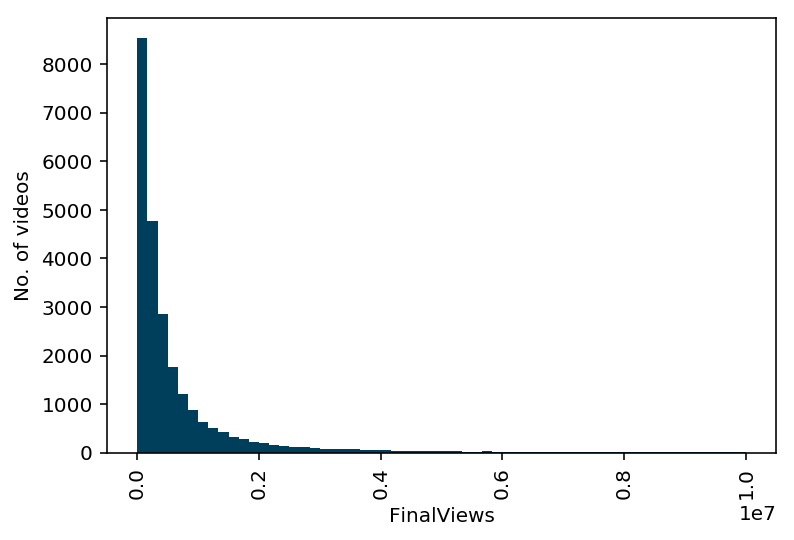

In [41]:
#Second, we check with an histogram the behavior of the views in the trending list by comparing wiht the number of videos
plt.rc('figure.subplot', wspace=0.9)
fig, ax = plt.subplots()
_ = sns.distplot(df_ca["FinalViews"], kde=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, 
                 bins=np.linspace(0, 1e7, 61), ax=ax)
_ = ax.set(xlabel="FinalViews", ylabel="No. of videos")
_ = plt.xticks(rotation=90)

Based on the histogram graph, the majority of trending videos have between 0 and 40MM views with a peak for videos with 20MM views or less. Let's find the percetange of the videos in the trending list that have less than 40MM views

In [42]:
df_ca[df_ca['FinalViews'] < 4e7]['FinalViews'].count() / df_ca['FinalViews'].count() * 100

99.92631104924878

With a percetange of 99% of the videos in the trending list with less than 40MM views. We can conclude that having from 1,023 to 40MM views give you a very high probability on getting into the trending list.

### Analysis 4 :
4.1 What is the likelihood of a trending video having capitalized words in its title?

4.2 What is the likelihood of a trending videos having expression marks ("!" or "?") in its title?

4.3 Does having capitalized words or expression marks in titles have any correlation with the number of views, likes, dislikes and comments?

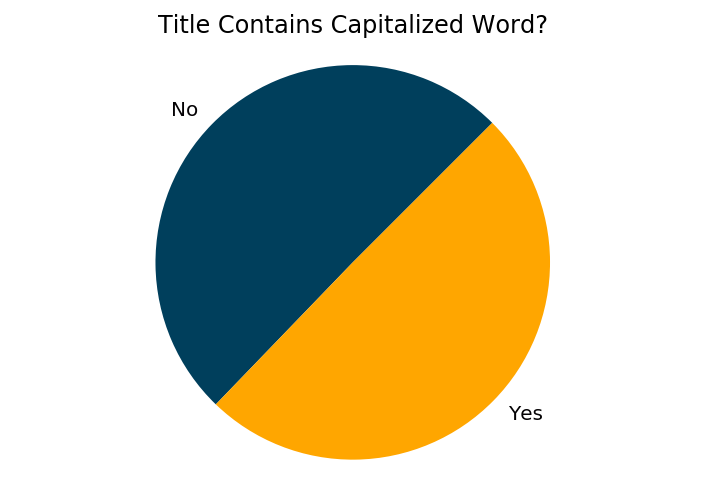

In [43]:
#4.1
#Now we want to see how many trending video titles contain at least a capitalized words. To do that, we will add a new variable (column) to the dataset whose value is True if the video title has at least a capitalized word in it, and False otherwise

def contains_capitalized_word(s):
    for w in s.split():
        if w.isupper():
            return True
    return False


df_ca["contains_capitalized"] = df_ca["Title"].apply(contains_capitalized_word)

value_counts = df_ca["contains_capitalized"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
           colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'}, startangle=45)
_ = ax.axis('equal')
_ = ax.set_title('Title Contains Capitalized Word?')

In [44]:
df_ca["contains_capitalized"].value_counts(normalize=True)

False    0.502886
True     0.497114
Name: contains_capitalized, dtype: float64

This means that 49.7% of trending video titles contain at least a capitalized word.

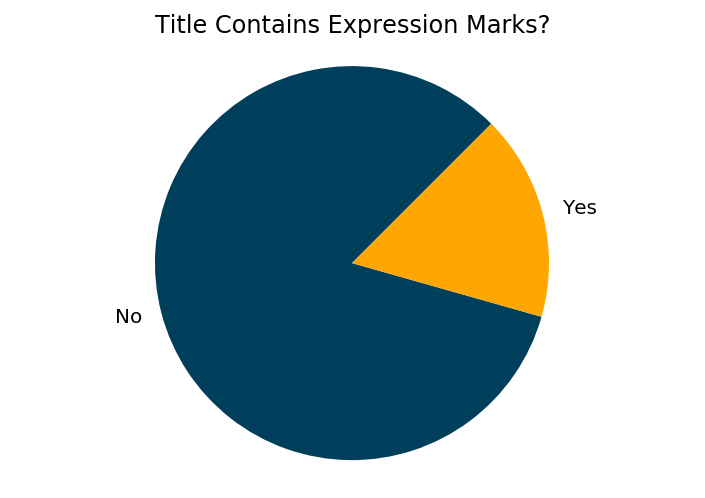

In [45]:
# 4.2 What is the likelihood of a trending videos having expression marks ("!" or "?") in its title?
def contains_expression_mark(s):
    for w in s.split():
        if "!" in s or "?" in s:
            return True
        return False


df_ca["contains_expressions"] = df_ca["Title"].apply(contains_expression_mark)

value_counts = df_ca["contains_expressions"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
           colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'}, startangle=45)
_ = ax.axis('equal')
_ = ax.set_title('Title Contains Expression Marks?')

In [46]:
df_ca["contains_expressions"].value_counts(normalize=True)

False    0.831048
True     0.168952
Name: contains_expressions, dtype: float64

This means that only 17% of trending video titles contain a exclamation or question mark. After this analysis with capital words and question marks, we will analize if having those characteristics in the titles have any positive correlation with the number of views, likes or comments or if not.

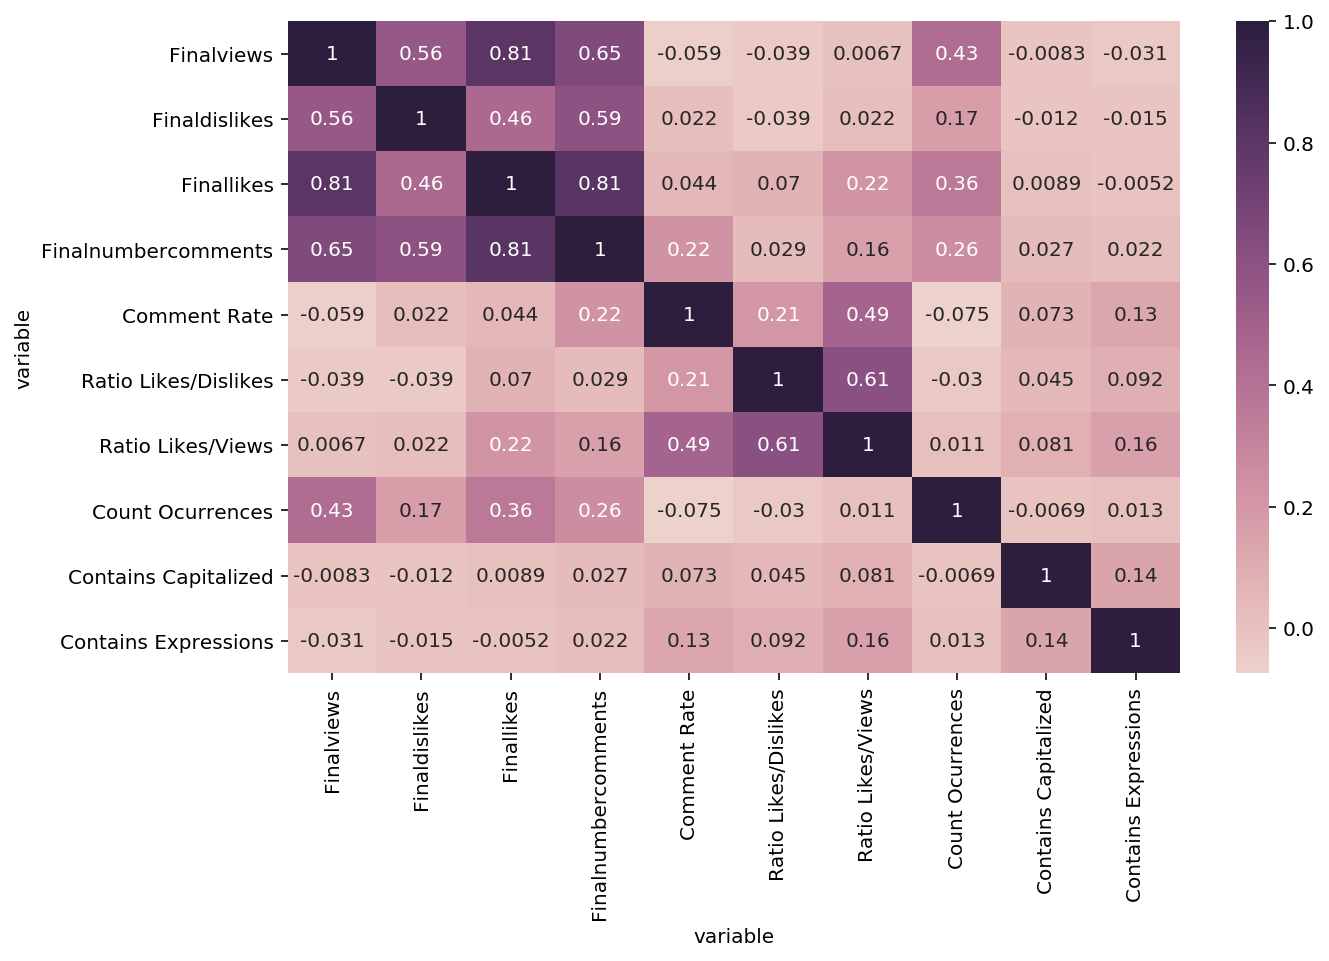

In [48]:
#4.3 Does having capitalized words or expression marks in titles have any correlation with the number of views, likes, dislikes and comments?
#Correlation Map
h_labels = [x.replace('_', ' ').title() for x in 
            list(df_ca.select_dtypes(include=['number', 'bool']).columns.values)]

fig, ax = plt.subplots(figsize=(10,6))
_ = sns.heatmap(df_ca.corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)

Based on the correlation map, we can see that all the videos with capitalized words in their titles have a negative correlation with dislikes and views. However, it has a positive correlation with likes and numbers of comments. We will do a scatter plot to investigate further those positive correlations.

Meanwhile, in the correlation for contains expression marks in the titles, we can see that it has a negative correlation with dislikes and likes and view. However, it has a positive correlation with numbers of comments. We will do a scatter plot to investigate further this positive correlation.

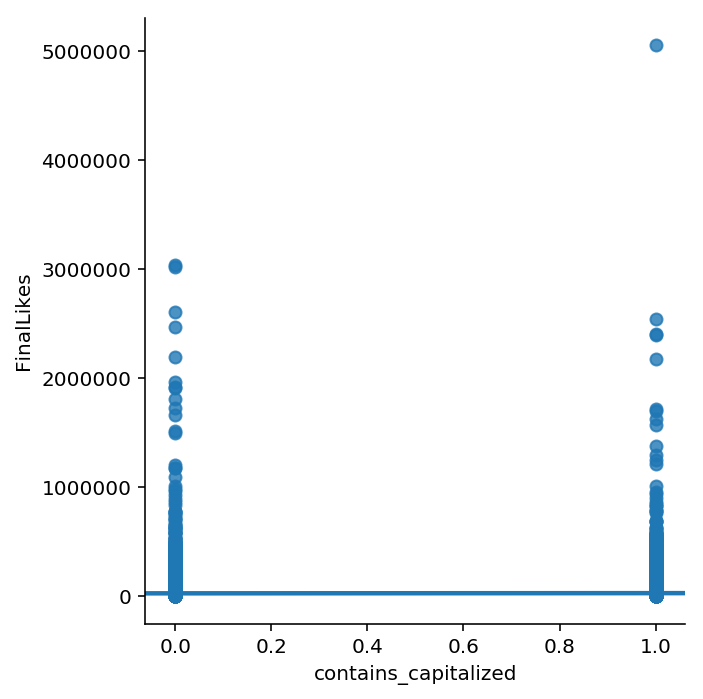

In [50]:
#scatter plot
sns.lmplot('contains_capitalized', 'FinalLikes',data=df_ca)

The scatter plot shows that the correlation between likes and contains capitalized words in the titles are is valid and ia positively correlated: as one increases, the other increases too, mostly.

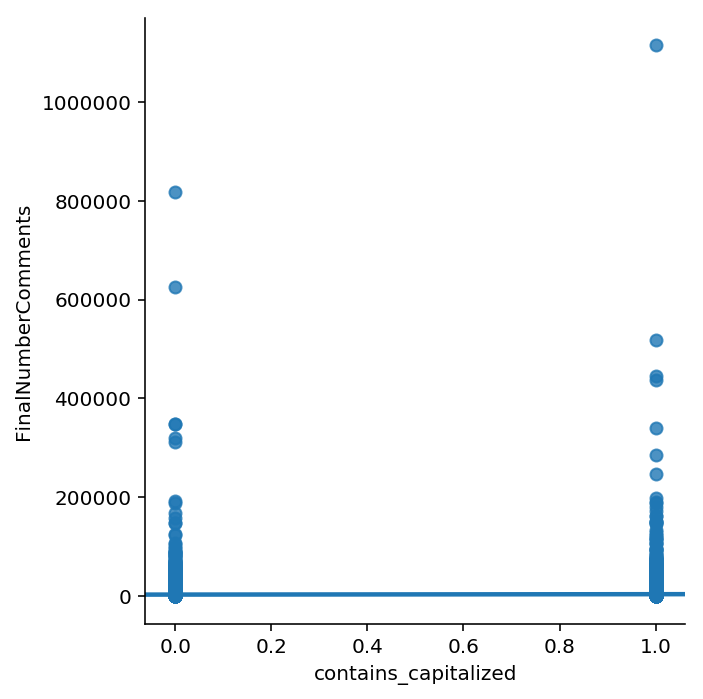

In [51]:
#scatter plot
sns.lmplot('contains_capitalized', 'FinalNumberComments',data=df_ca)

The scatter plot shows that the correlation between Number of Comments and contains capitalized words in the titles is valid and is positively correlated: as one increases, the other increases too, mostly.

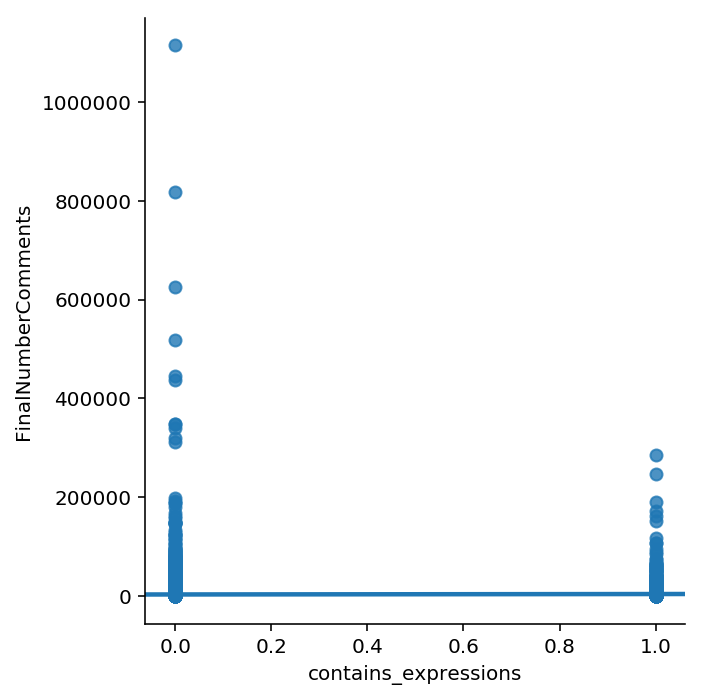

In [52]:
#scatter plot
sns.lmplot('contains_expressions', 'FinalNumberComments',data=df_ca)

The scatter plot shows that the correlation between Number of Comments and contains expression words in the titles is valid and is positively correlated: as one increases, the other increases too, mostly.

### Analysis 5:Is there a correlation between the number of tags and the video trending?

In [54]:
#Extract columns of "Finalviews' and 'Tags" to find the data useful for correlation
df_FinalViews_tags=df_ca[['Tags','FinalViews']]

In [55]:
df_FinalViews_tags.head(5)

variable,Tags,FinalViews
Video Id,,
--45ws7CEN0,"playstation|""playstation 4""|""playstation europ...",309197
--7vNbh4UNA,"Elizabeth Hurley|""Instagram""|""Outrage""|""scanda...",1335225
--MtKsH5oBY,"RedsTech|""bein sports""|""ريال مدريد""|""real madr...",511042
--YgtVuvWGo,"Jessie|""Reyez""|""Body""|""Count""|""Island""|""Records""",362391
--iJShLChIc,[none],54691


In [56]:
df_FinalViews_tags.dtypes

variable
Tags          object
FinalViews     int64
dtype: object

In [57]:
## We use reset_index to reset the index of df_ca and use the default one
df_FinalViews_tags.reset_index(inplace=True)

In [58]:
# Change the data type of 'Tags' to Integer to do the correlation
df_FinalViews_tags['Tags'][0].split('|')

['playstation',
 '"playstation 4"',
 '"playstation europe"',
 '"playstation eu"',
 '"playstation games"',
 '"ps4"',
 '"ps 4"',
 '"psvr"',
 '"playstation vr"',
 '"ps vr"',
 '"Playstation virtual reality"',
 '"virtual reality"',
 '"playstation 4 pro"',
 '"PS4 Pro"',
 '"PS4Pro"',
 '"playstation pro"',
 '"death stranding"',
 '"spider-man"',
 '"the last of us part 2"',
 '"the last of us part ii"',
 '"ghost of tsushima"',
 '"new trailer"',
 '"press conference"',
 '"showcase"',
 '"gameplay"',
 '"new gameplay"',
 '"e32018"',
 '"E3 2018"',
 '"playstation e3 2018"',
 '"playstation e3"',
 '"playstation e3 press conference"']

In [59]:
len(df_FinalViews_tags['Tags'][0].split('|'))

31

In [60]:
df_FinalViews_tags['Count of Tags'] = df_FinalViews_tags['Tags'].apply(lambda x: len(x.split('|')))

In [61]:
df_FinalViews_tags.head()

variable,Video Id,Tags,FinalViews,Count of Tags
0,--45ws7CEN0,"playstation|""playstation 4""|""playstation europ...",309197,31
1,--7vNbh4UNA,"Elizabeth Hurley|""Instagram""|""Outrage""|""scanda...",1335225,17
2,--MtKsH5oBY,"RedsTech|""bein sports""|""ريال مدريد""|""real madr...",511042,11
3,--YgtVuvWGo,"Jessie|""Reyez""|""Body""|""Count""|""Island""|""Records""",362391,6
4,--iJShLChIc,[none],54691,1


In [62]:
df_FinalViews_tags.dtypes

variable
Video Id         object
Tags             object
FinalViews        int64
Count of Tags     int64
dtype: object

In [63]:
## df.corr help us to compute correlation between columns
df_corr=df_FinalViews_tags[['Count of Tags','FinalViews']].corr()

In [64]:
df_corr

variable,Count of Tags,FinalViews
variable,,
Count of Tags,1.000000,0.024077
FinalViews,0.024077,1.000000


The value of 0.024077 shows there is no correlation between the two variables (Count of Tags and Views) 

### Analysis 6:Is there a correlation between the trending duration and days of publish?

In order to do Analysis for the above question, we need to find a date of Publish and Trending. And we also need to calculate the number of days it trended. 

For this question we will reload the unpacked dataset as df_CA_q6 and do all of our analysis with it.


In [70]:
file_name = 'CAvideos.csv' 
df_CA_q6 = pd.read_csv(file_name, index_col='video_id')
df_CA_q6.head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
video_id,,,,,,,,,,,,,,,
n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...


In [71]:
df_CA_q6.shape

(40881, 15)

In [72]:
#Extracting Publish Date from Publish Time
df_CA_q6['trending_date'] = pd.to_datetime(df_CA_q6['trending_date'],errors='coerce', format='%y.%d.%m')
df_CA_q6['publish_time'] = pd.to_datetime(df_CA_q6['publish_time'], errors='coerce', format='%Y-%m-%dT%H:%M:%S.%fZ')

df_CA_q6.insert(4, 'publish_date', df_CA_q6['publish_time'].dt.date)
df_CA_q6['publish_time'] = df_CA_q6['publish_time'].dt.time

In [73]:
df_CA_full = df_CA_q6.reset_index().sort_values('trending_date').set_index('video_id')
df_CA_q6 = df_CA_q6.reset_index().sort_values('trending_date').drop_duplicates('video_id',keep='last').set_index('video_id')
df_CA_q6[['publish_date','publish_time']].head()

,publish_date,publish_time
video_id,,
pVu4zRW5eso,2017-11-13,11:22:25
JdHovvb0KD4,2017-11-13,16:10:21
QEBTK5_dRZ0,2017-11-13,02:00:00
JccE_V5q0-Q,2017-11-12,14:06:59
O-_52G3aKVU,2017-11-12,09:23:20


## We keep two sets of data here:

    - df_CA_q6 (which only keep the last entry if duplicated)
    - df_CA_full ( full set of combined data, so that we can get the first entry of duplicated data as well)

In [74]:
df_CA_q6.shape

(24427, 16)

In [76]:
df_CA_full.shape

(40881, 16)

### Getting the days on trend for videos

In [77]:
publish_to_trend = {}
df_CA_first = df_CA_full.reset_index().drop_duplicates('video_id',keep ='first').set_index('video_id')
diff_first = (df_CA_first['trending_date']).astype('datetime64[ns]')-df_CA_first['publish_date'].astype('datetime64[ns]')
diff_first.head()

video_id
n1WpP7iowLc   4 days
pVu4zRW5eso   1 days
JdHovvb0KD4   1 days
QEBTK5_dRZ0   1 days
JccE_V5q0-Q   2 days
dtype: timedelta64[ns]

In [78]:
diff_first = diff_first.reset_index()
diff_first.columns = ['video_id','publish_to_trend']

for i, row in diff_first.iterrows():
    publish_to_trend[row['video_id']] = row['publish_to_trend'].days


In [79]:

df_CA_last = df_CA_q6
diff_last = df_CA_q6['trending_date'].astype('datetime64[ns]')-df_CA_q6['publish_date'].astype('datetime64[ns]')
diff_last = diff_last.reset_index()
diff_last.columns = ['video_id','publish_to_trend_last']
diff_last.head()

,video_id,publish_to_trend_last
0,pVu4zRW5eso,1 days
1,JdHovvb0KD4,1 days
2,QEBTK5_dRZ0,1 days
3,JccE_V5q0-Q,2 days
4,O-_52G3aKVU,2 days


In [81]:
df_CA_q6 = df_CA_q6.reset_index()
df_CA_q6.insert(4,'publish_to_trend_last', diff_last['publish_to_trend_last'].astype('timedelta64[D]').astype(int))
df_CA_q6.insert(4, 'publish_to_trend', df_CA_q6['video_id'].map(publish_to_trend))
df_CA_q6.insert(4, 'trend_duration', 0)

In [82]:
df_CA_q6['trend_duration'] = (df_CA_q6['publish_to_trend_last']-df_CA_q6['publish_to_trend'])+1
df_CA_q6.set_index('video_id')[['publish_to_trend','trend_duration']].sort_values('trend_duration',ascending=False).head()

,publish_to_trend,trend_duration
video_id,,
6ZfuNTqbHE8,1,8
l_lblj8Cq0o,1,8
VYOjWnS4cMY,0,8
UceaB4D0jpo,0,8
My4RA5I0FKs,1,7


Text(0.5,1,'Correlation between Days from Publish v/s Trend and Trending Duration')

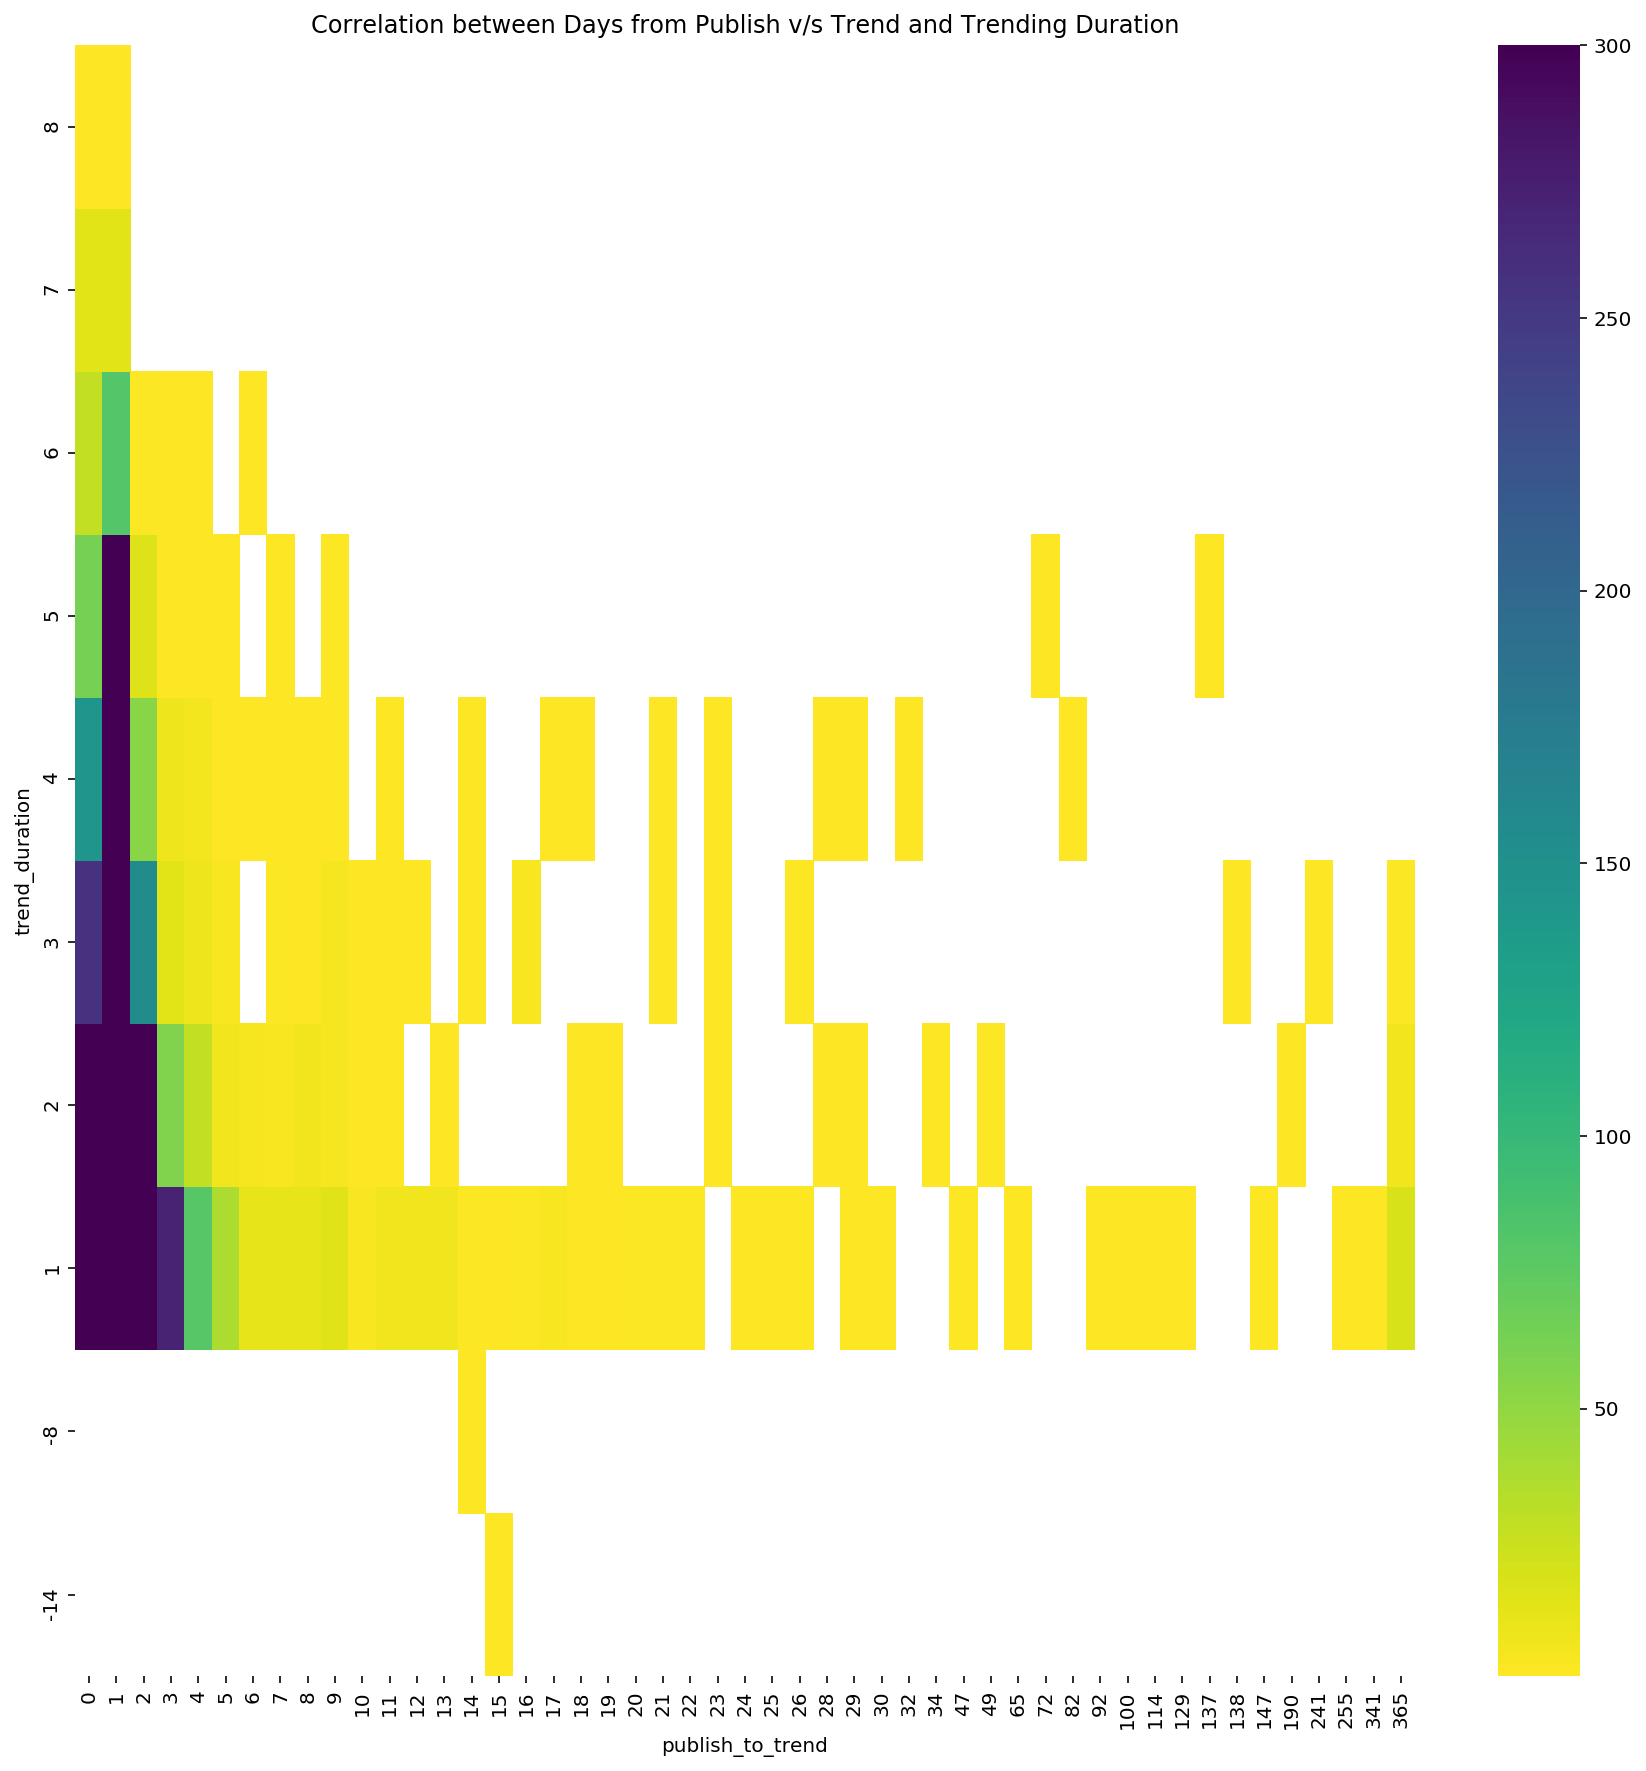

In [84]:
df_CA_q6['publish_to_trend'] = df_CA_q6['publish_to_trend'].clip(upper=365)
cat_trend_duration= df_CA_q6.groupby(['trend_duration','publish_to_trend']).count()['video_id'].unstack().clip(upper=300)
plt.figure(figsize=(15,15))
ax = sns.heatmap(cat_trend_duration, cmap='viridis_r')
ax.invert_yaxis()
plt.title("Correlation between Days from Publish v/s Trend and Trending Duration")

We clip the days from publish to trend for any number larger than 365.

Our Observation is:

    - The less days needed for a video from publish to trend, the longer the trend duration.
    - Videos that can get into trending within 4 days (Purple Color) will have higher probability to be trending for longer time.
    

### Analysis 7: Perform a sentiment analysis on the video titles. The value SentimentScore indicates the magnitude of sentiment as well as the direction (positive/good or negative/bad).

Text(0,0.5,'Sentiment Score')

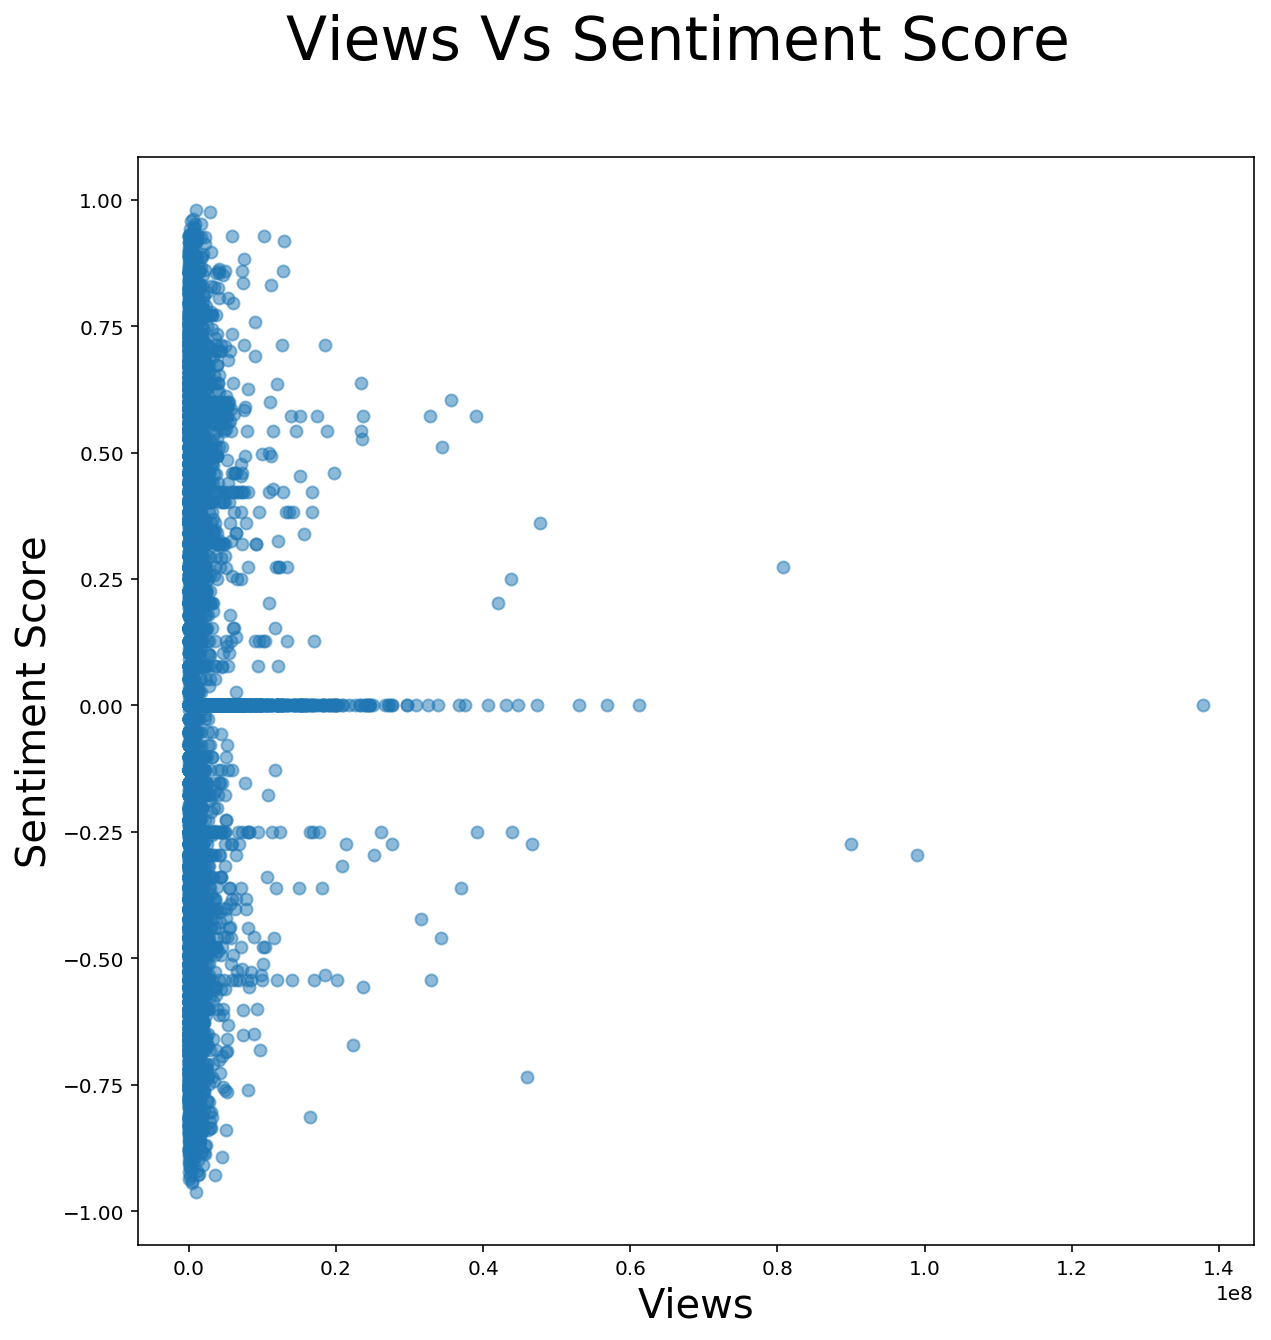

In [86]:
stop_words = set(stopwords.words('english'))
porter = PorterStemmer()
english_words = set(nltk.corpus.words.words())

#here we remove all non-alphanumeric words and stem the words
def cleanTokens(value):
    return [porter.stem(word) for word in value if word.isalpha()]

#here we remove the stop words
def removeStopWords(value):
    return [w for w in value if not w in stop_words]

#here we only return the values if the word is english
def checkEnglish(value):
    return [w for w in value if w in english_words]

#the TokenizedTitle is a column storing word tokens generated from the title
df_ca['TokenizedTitle'] = df_ca['Title'].apply(word_tokenize).apply(cleanTokens).apply(checkEnglish)
df_ca['TokenizedTitle'] = df_ca['TokenizedTitle'].apply(lambda x: np.nan if len(x) is 0 else x)
#we drop the rows with no word tokens because those videos would no be english
df_ca = df_ca.dropna()
df_ca['TokenizedTitle'] = df_ca['TokenizedTitle'].apply(removeStopWords)

#we perform the sentiment analysis here
sid = SentimentIntensityAnalyzer()
def performSentimentAnalysis(row):
    sentiment_score = sid.polarity_scores(row['Title'])
    row["SentimentScore"] = sentiment_score["compound"]
    return row

df_ca = df_ca.apply(performSentimentAnalysis, axis=1)

fig = plt.figure(figsize=(10,10))
plt.scatter(df_ca['FinalViews'], df_ca['SentimentScore'], alpha=0.5)
fig.suptitle('Views Vs Sentiment Score', fontsize=30)
plt.xlabel('Views', fontsize=20)
plt.ylabel('Sentiment Score', fontsize=20)

Seeing that there are a few outliers. We remove those outliers to get a clearer visualization on what the plot shows. 

Text(0,0.5,'Sentiment Score')

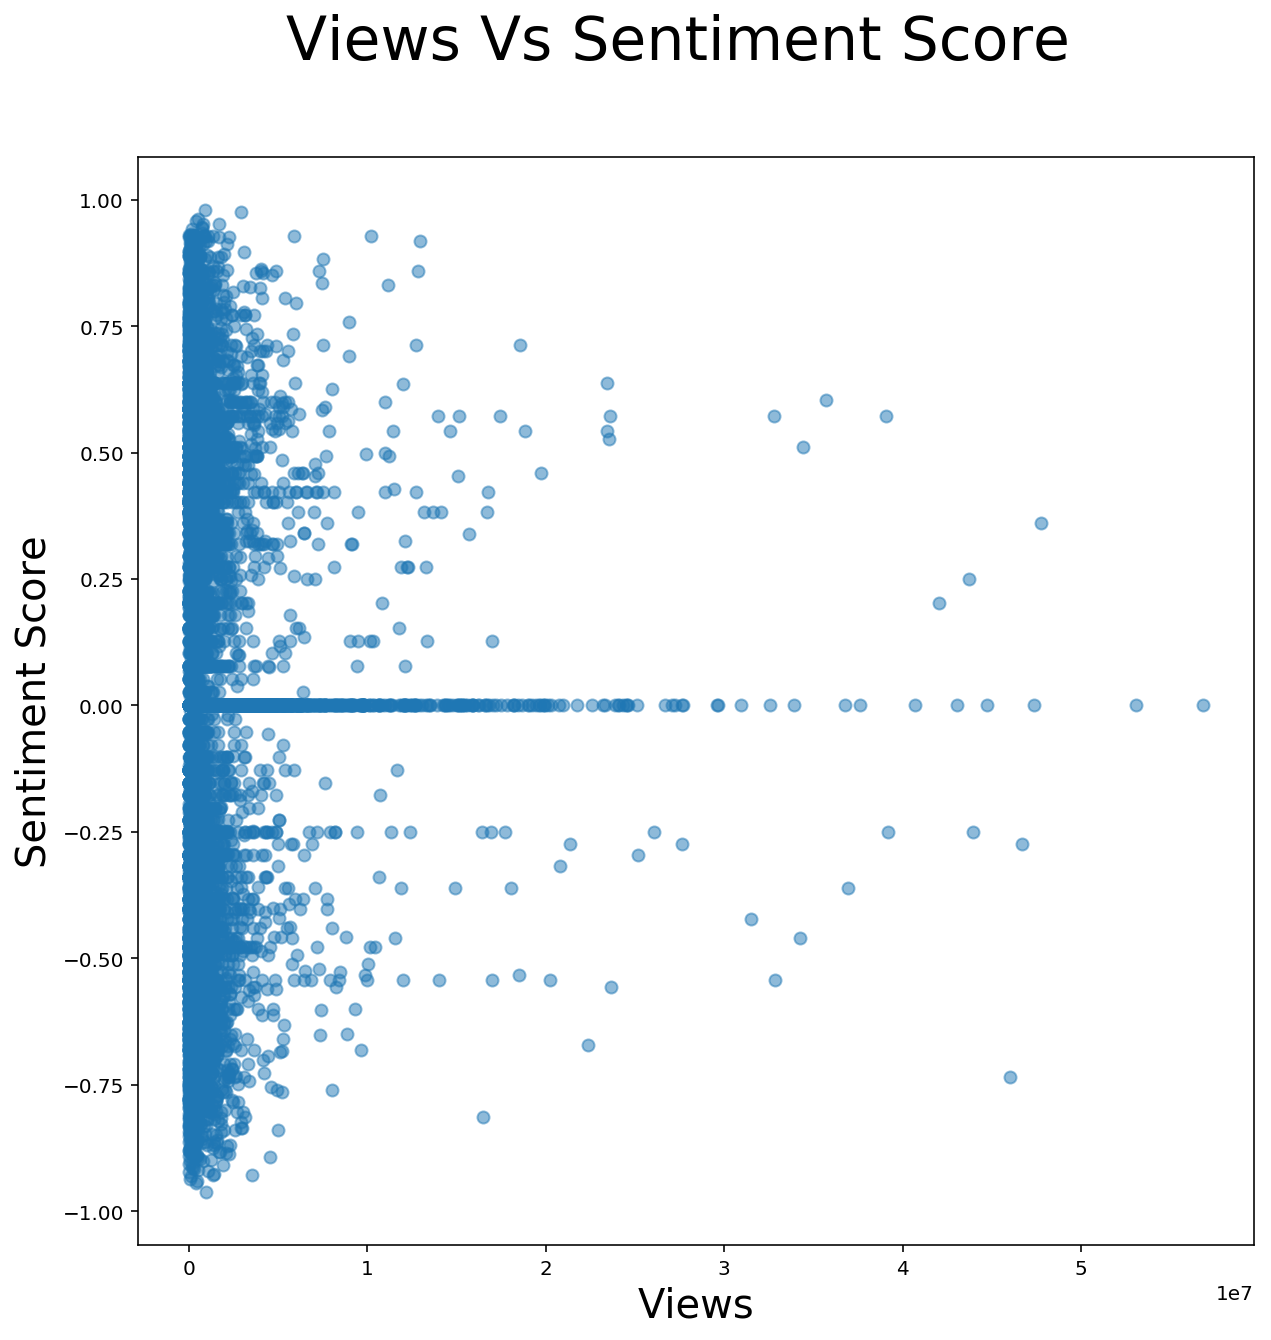

In [88]:
removed_outliers_df_ca = df_ca[df_ca['FinalViews'] <= 60000000]
fig = plt.figure(figsize=(10,10))
plt.scatter(removed_outliers_df_ca['FinalViews'], removed_outliers_df_ca['SentimentScore'], alpha=0.5)
fig.suptitle('Views Vs Sentiment Score', fontsize=30)
plt.xlabel('Views', fontsize=20)
plt.ylabel('Sentiment Score', fontsize=20)

Notice that the videos are in three groups. You have the positive, negative and neutral. It seems like titles with a neutral sentiment receives more attention. Lets take a closer look at this by grouping the positive and negative video titles.

Text(0,0.5,'Sentiment Score')

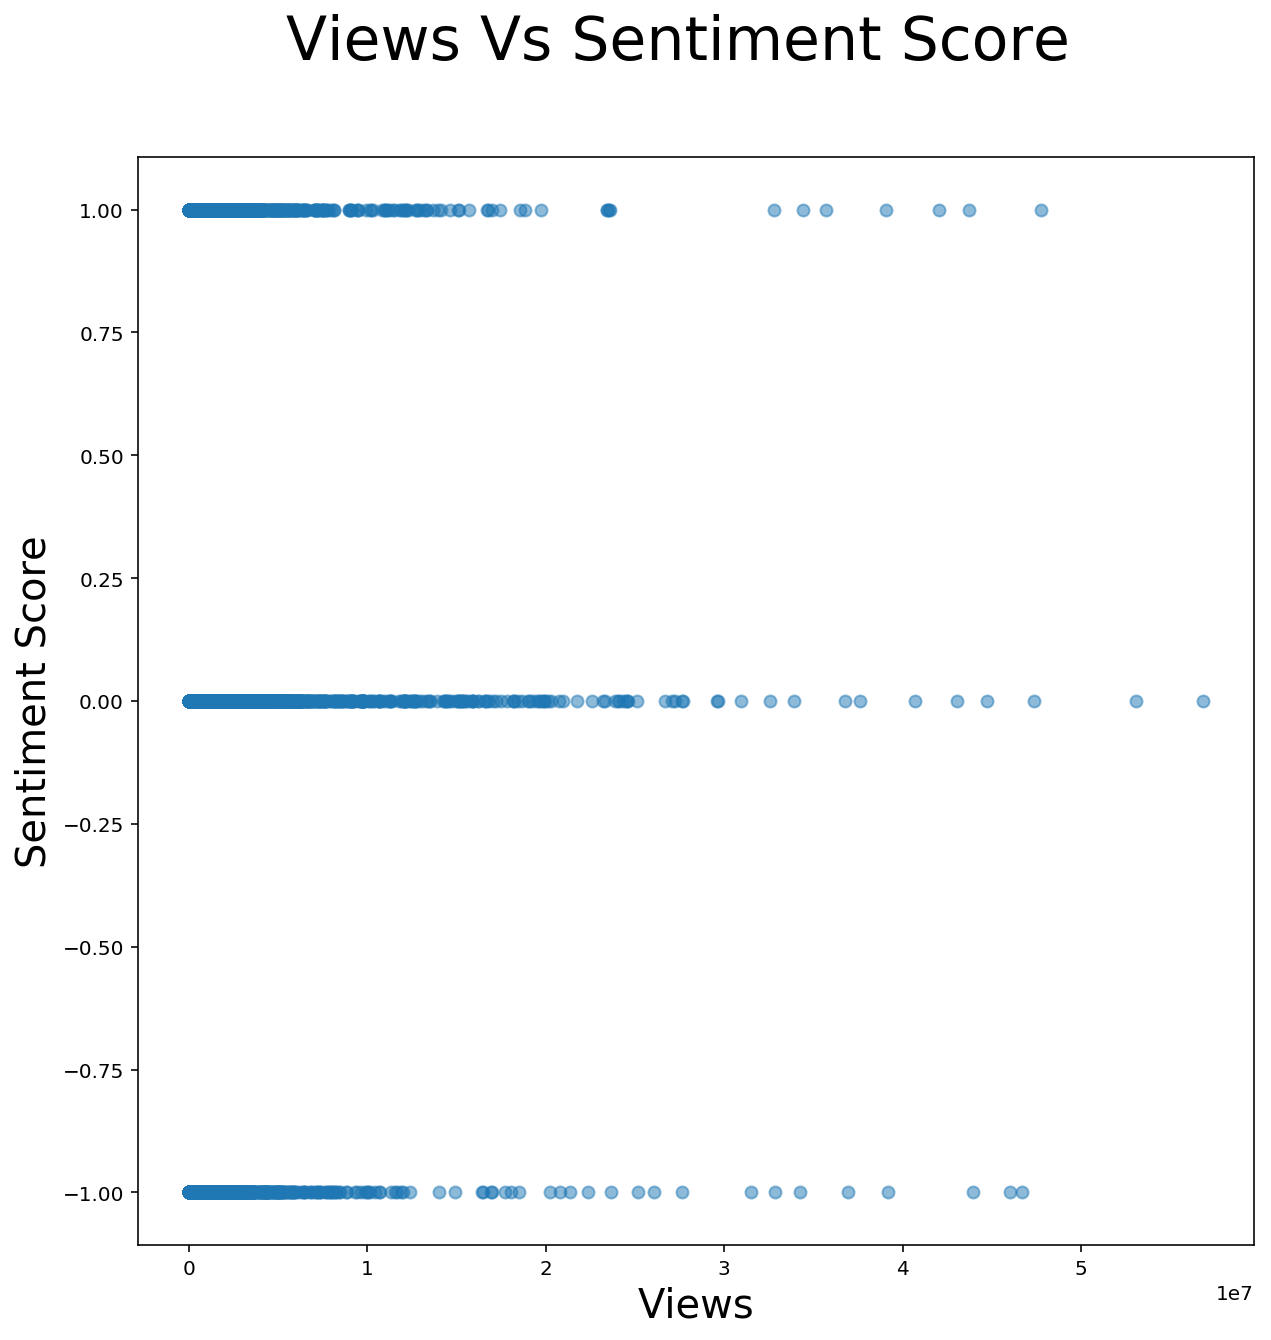

In [89]:
def getSentiment(value):
    if value > 0:
        return 1
    elif value < 0:
        return -1
    else:
        return 0
    
removed_outliers_df_ca['Sentiment'] = removed_outliers_df_ca['SentimentScore'].apply(getSentiment)
fig = plt.figure(figsize=(10,10))
plt.scatter(removed_outliers_df_ca['FinalViews'], removed_outliers_df_ca['Sentiment'], alpha=0.5)
fig.suptitle('Views Vs Sentiment Score', fontsize=30)
plt.xlabel('Views', fontsize=20)
plt.ylabel('Sentiment Score', fontsize=20)

Through this, we can visualize that negative videos do not get as many views as neutral or positive. Neutral videos however, get more attention then the other sentiments. By calculating the average views for those sentiments, we see that there isn't a larger different between positive and neutral sentiments. However, there is a large difference between Negative sentiment and others. This would imply that videos have a positive/neutral sentiment in their video title would garner more video views. However, a significantly larger portion of the trending videos tend to be neutral.

In [90]:
print("Positive Sentiment Average Views and Count")
print(removed_outliers_df_ca[removed_outliers_df_ca['Sentiment'] == 1]['FinalViews'].mean())
print(removed_outliers_df_ca[removed_outliers_df_ca['Sentiment'] == 1]['FinalViews'].count())
print("Neutral Sentiment Average Views and Count")
print(removed_outliers_df_ca[removed_outliers_df_ca['Sentiment'] == 0]['FinalViews'].mean())
print(removed_outliers_df_ca[removed_outliers_df_ca['Sentiment'] == 0]['FinalViews'].count())
print("Negative Sentiment Average Views and Count")
print(removed_outliers_df_ca[removed_outliers_df_ca['Sentiment'] == -1]['FinalViews'].mean())
print(removed_outliers_df_ca[removed_outliers_df_ca['Sentiment'] == -1]['FinalViews'].count())


Positive Sentiment Average Views and Count
865632.6475656182
4991
Neutral Sentiment Average Views and Count
867806.116435477
11895
Negative Sentiment Average Views and Count
795450.2397540984
4880


In [91]:
##### We are normalizing the case here as well
word_tokens = word_tokenize(' '.join(df_ca['Title'].str.lower().values))

# remove all tokens that are not alphabetic
stripped = [word for word in word_tokens if word.isalpha()]

# remove stop words
stop_words = set(stopwords.words('english'))
filtered_sentence = [w for w in stripped if not w in stop_words]

# stemming of words
porter = PorterStemmer()
stemmed = [porter.stem(word) for word in filtered_sentence]

#filter non-english words
english_words = set(nltk.corpus.words.words())
results = [w for w in stemmed if w in english_words]

counts = Counter(results).most_common()
word_tag_pairs = nltk.pos_tag(results, tagset='universal')
counts

[('full', 1245),
 ('trump', 948),
 ('game', 860),
 ('video', 835),
 ('new', 716),
 ('song', 636),
 ('highlight', 553),
 ('season', 514),
 ('live', 460),
 ('de', 451),
 ('trailer', 445),
 ('drama', 442),
 ('show', 425),
 ('music', 420),
 ('part', 408),
 ('top', 407),
 ('best', 404),
 ('react', 391),
 ('news', 360),
 ('get', 358),
 ('time', 354),
 ('first', 344),
 ('make', 338),
 ('food', 336),
 ('day', 328),
 ('tri', 301),
 ('may', 301),
 ('la', 282),
 ('real', 281),
 ('joe', 279),
 ('march', 276),
 ('break', 265),
 ('final', 262),
 ('latest', 252),
 ('life', 247),
 ('test', 246),
 ('war', 239),
 ('love', 236),
 ('world', 231),
 ('star', 222),
 ('award', 210),
 ('know', 208),
 ('take', 203),
 ('one', 203),
 ('interview', 201),
 ('talk', 197),
 ('comment', 193),
 ('royal', 193),
 ('win', 188),
 ('view', 188),
 ('last', 187),
 ('watch', 184),
 ('goal', 183),
 ('ever', 183),
 ('look', 179),
 ('raptor', 176),
 ('feat', 176),
 ('want', 175),
 ('crime', 173),
 ('year', 168),
 ('review', 168),

### Analysis 8: Word Vector Scatter Plot

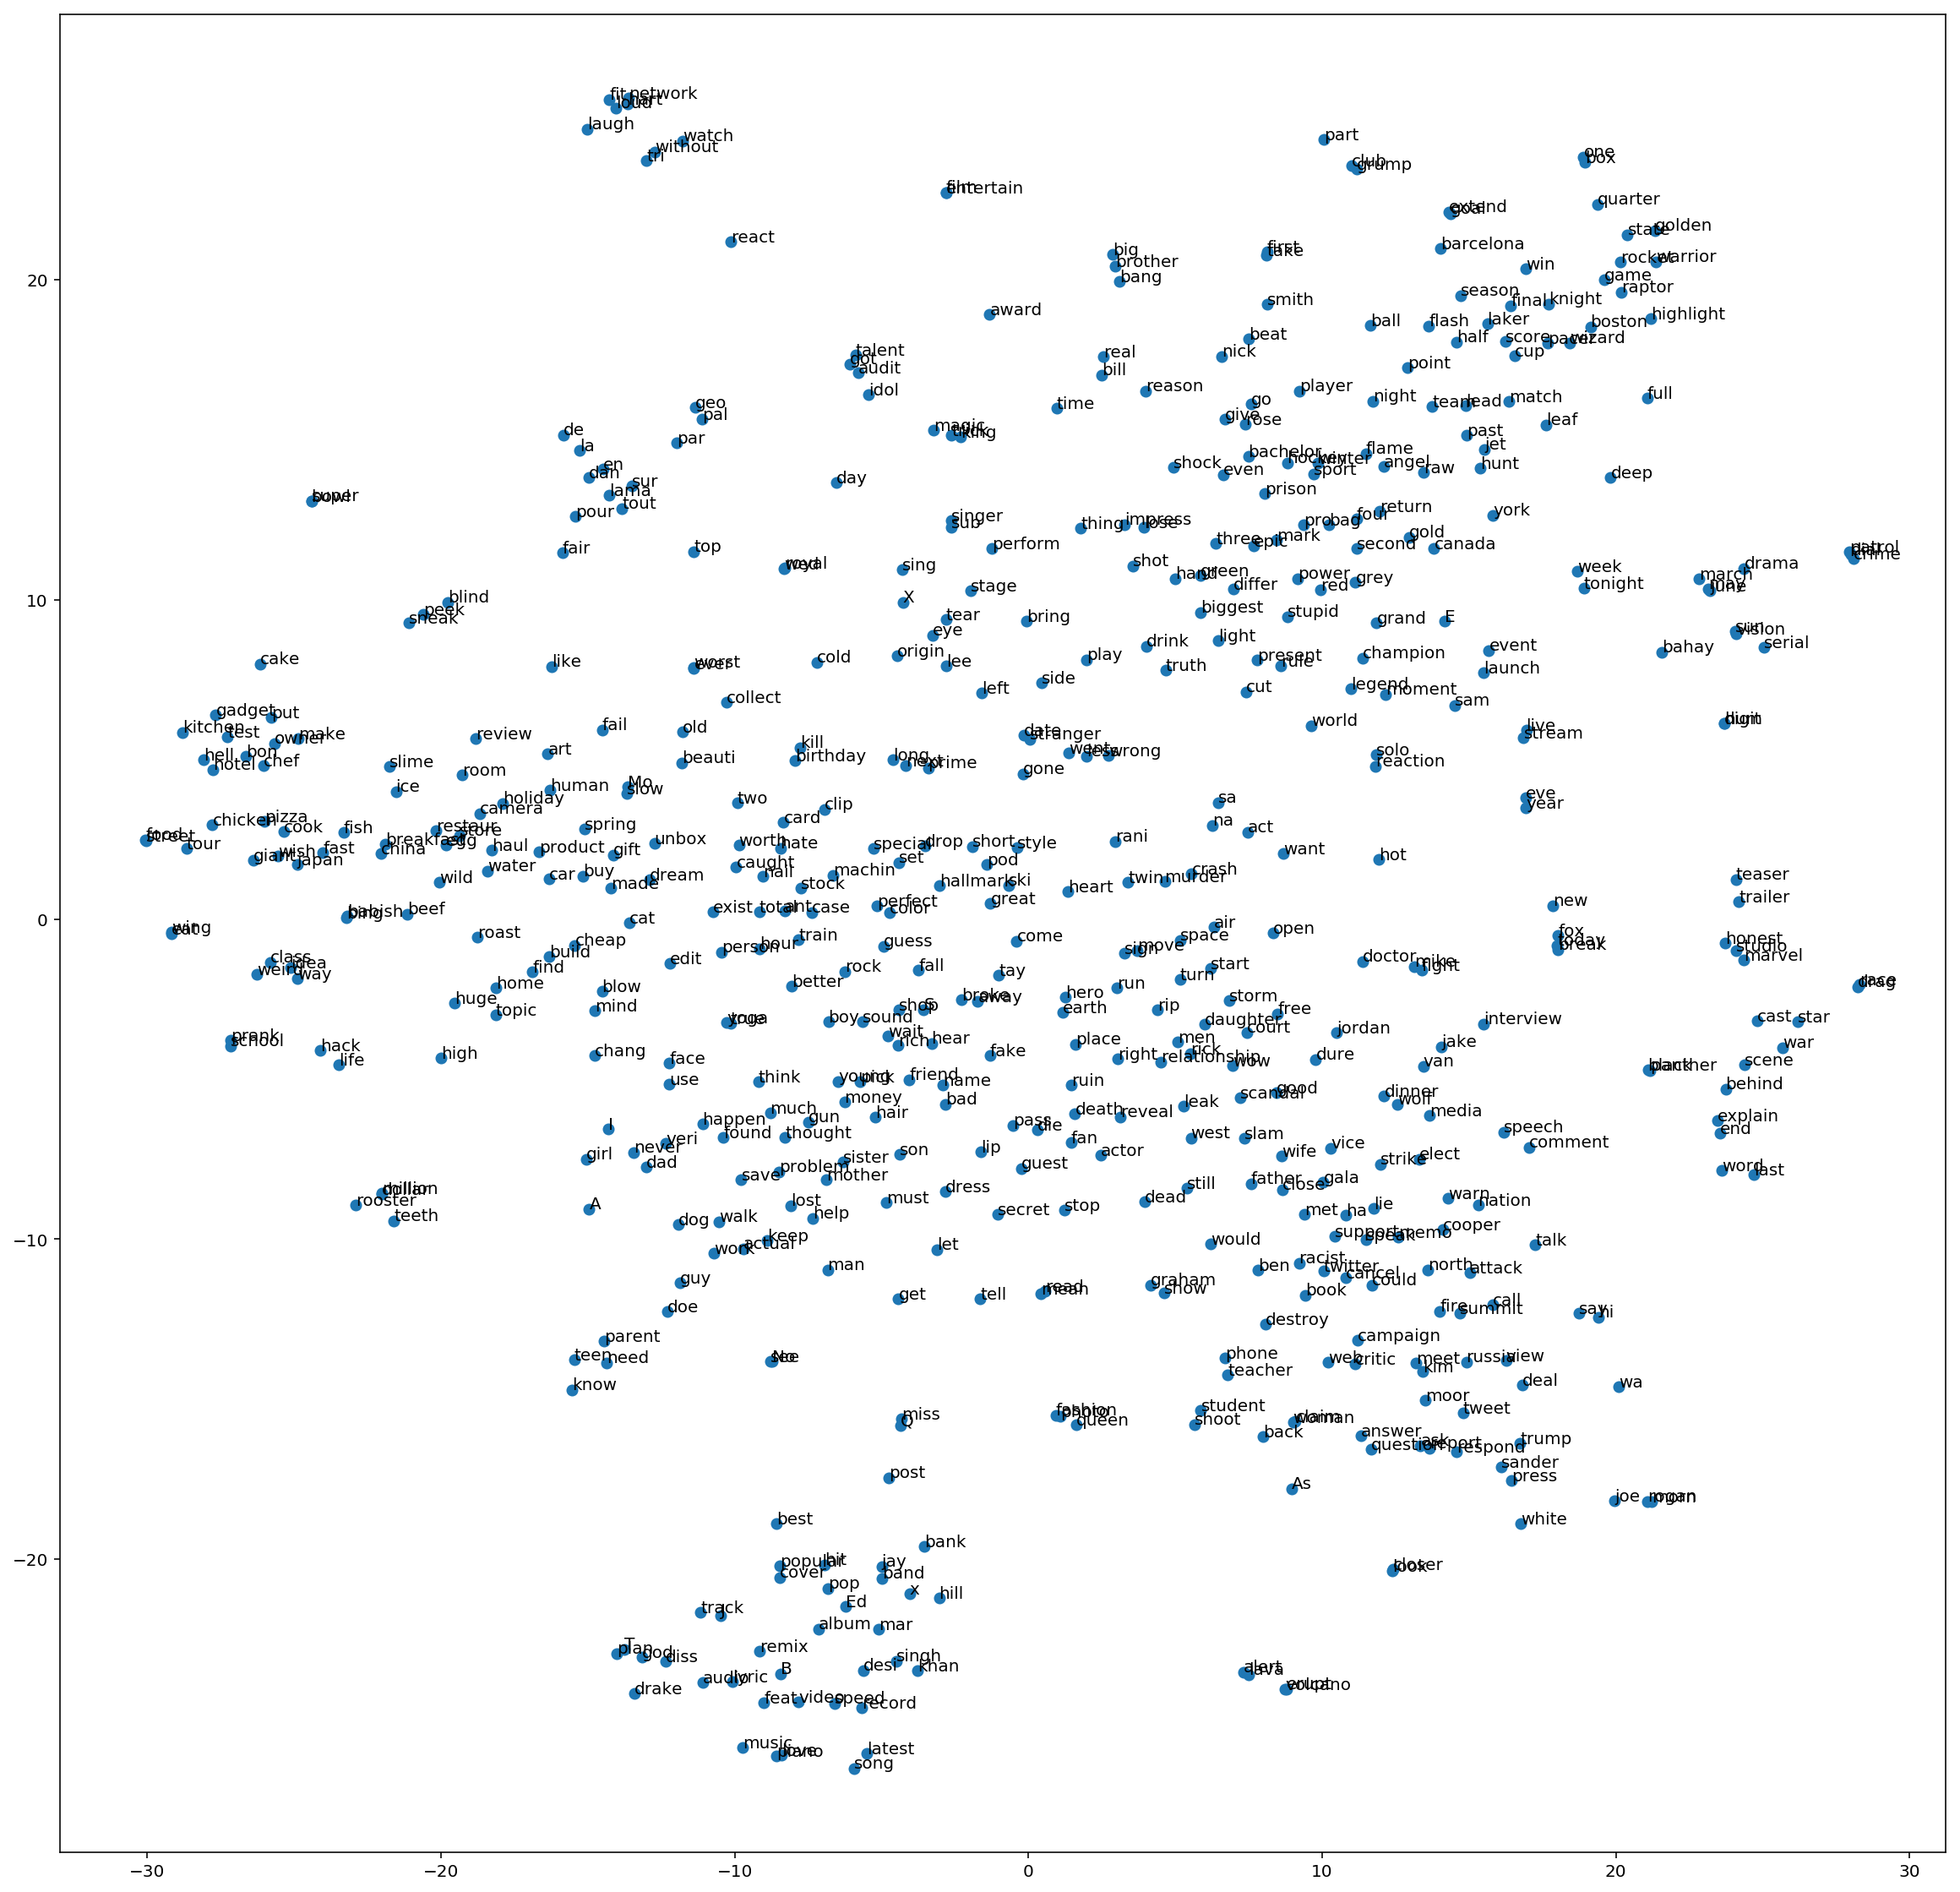

In [92]:
model = gensim.models.Word2Vec(
    df_ca['TokenizedTitle'],
    size=150,
    window=10,
    min_count=30,
    workers=10)
model.train(df_ca['TokenizedTitle'], total_examples=len(df_ca['TokenizedTitle']), epochs=10)
vocab = list(model.wv.vocab)
X = model[vocab]
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)
word_vector_df = pd.DataFrame(X_tsne, index=vocab, columns=['x', 'y'])
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(1, 1, 1)

ax.scatter(word_vector_df['x'], word_vector_df['y'])
for word, pos in word_vector_df.iterrows():
    ax.annotate(word, pos)
    
plt.show()

Looking at X=10, Y=20 we see the word Trump which is one of the must used words when naming titles. The words close to trump are: sanders, russia, report, and tweet. From this we know that the word trump, is actually refering to Donald Trump. and that a lot of the trending videos have his name in their title.
Additionally, you see video, music and song close to eachother at X=-25,Y=-15. This would indicate that music videos are also very likely to make it to the trending lists ans song, video and music are not only very common words in video titles, but they are also frequently used with each other.